In [24]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import Normalize
import shapely

# Import des bibliothèques supplémentaires
from scipy import stats
from scipy.stats import shapiro, levene
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

In [25]:
# Importation des données
data_aheme = pd.read_excel("Data_Aheme.xlsx", sheet_name="Data_Aheme")
iqe = pd.read_excel("Data_Aheme.xlsx", sheet_name="iqe")
ccme = pd.read_excel("Data_Aheme.xlsx", sheet_name="ccme")
# Création d'une copie du dataframe
df_copy = data_aheme.copy()

# Méthode de l’indice arithmétique pondéré 

In [26]:
iqe

,Stations,GSP,GSP_Classe,GSS,GSS_Classe,PSP,PSP_Classe,PSS,PSS_Classe
0,A1,29.597048,Bonne qualité,1266.001687,Eau non potable,43.062402,Bonne qualité,47.635028,Bonne qualité
1,A2,25.223354,Bonne qualité,1575.526886,Eau non potable,44.429775,Bonne qualité,58.330233,Mauvaise qualité
2,A3,28.797647,Bonne qualité,1399.894734,Eau non potable,37.563197,Bonne qualité,394.800713,Eau non potable
3,A4,28.453133,Bonne qualité,1446.299650,Eau non potable,36.098678,Bonne qualité,535.561355,Eau non potable
4,A5,34.159396,Bonne qualité,1531.611173,Eau non potable,39.119294,Bonne qualité,451.192953,Eau non potable
5,A6,32.855350,Bonne qualité,1525.073239,Eau non potable,40.389150,Bonne qualité,41.451242,Bonne qualité
6,A7,32.337009,Bonne qualité,1002.330799,Eau non potable,42.949328,Bonne qualité,33.501251,Bonne qualité
7,A8,32.388785,Bonne qualité,1539.904607,Eau non potable,45.704543,Bonne qualité,48.889449,Bonne qualité
8,A9,29.955320,Bonne qualité,1414.524149,Eau non potable,47.177314,Bonne qualité,74.128499,Mauvaise qualité
9,A10,40.690044,Bonne qualité,1671.326053,Eau non potable,46.255208,Bonne qualité,59.723259,Mauvaise qualité


In [27]:
couleurs_classes = {
    'Bonne qualité': 'green',
    'Mauvaise qualité': 'orange', 
    'Eau non potable': 'red'
}

In [28]:
df = iqe

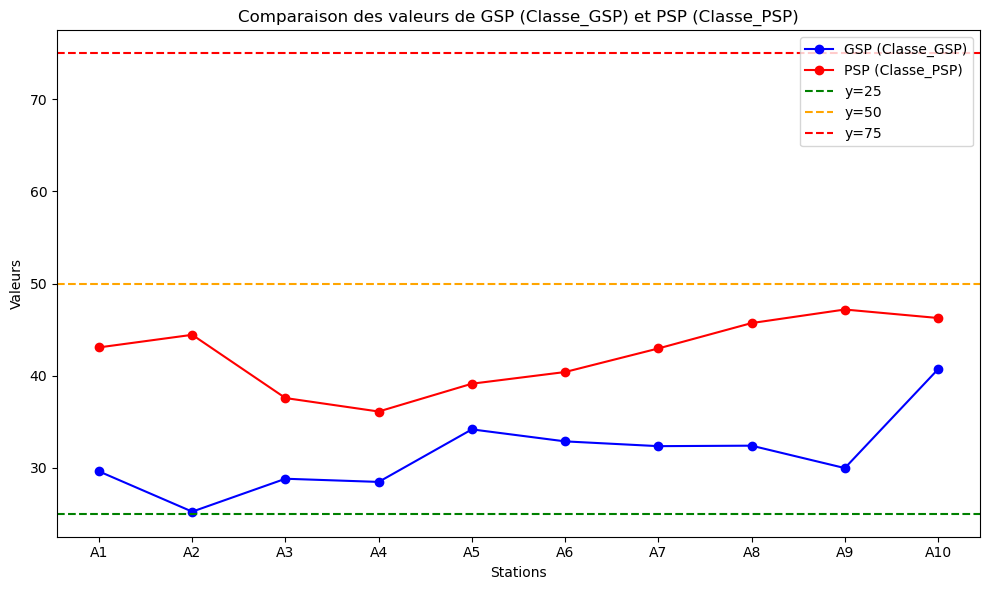

In [32]:
# First plot comparing GSP and PSP with horizontal lines at y=25, 50, and 75
plt.figure(figsize=(10, 6))
plt.plot(df['Stations'], df['GSP'], label='GSP (Classe_GSP)', marker='o', color='blue')
plt.plot(df['Stations'], df['PSP'], label='PSP (Classe_PSP)', marker='o', color='red')
plt.axhline(y=25, color='green', linestyle='--', label='y=25')
plt.axhline(y=50, color='orange', linestyle='--', label='y=50')
plt.axhline(y=75, color='red', linestyle='--', label='y=75')
plt.xlabel('Stations')
plt.ylabel('Valeurs')
plt.title('Comparaison des valeurs de GSP (Classe_GSP) et PSP (Classe_PSP)')
plt.legend()
plt.tight_layout()
plt.savefig("Comparaison_he.png", dpi=300)
plt.show()



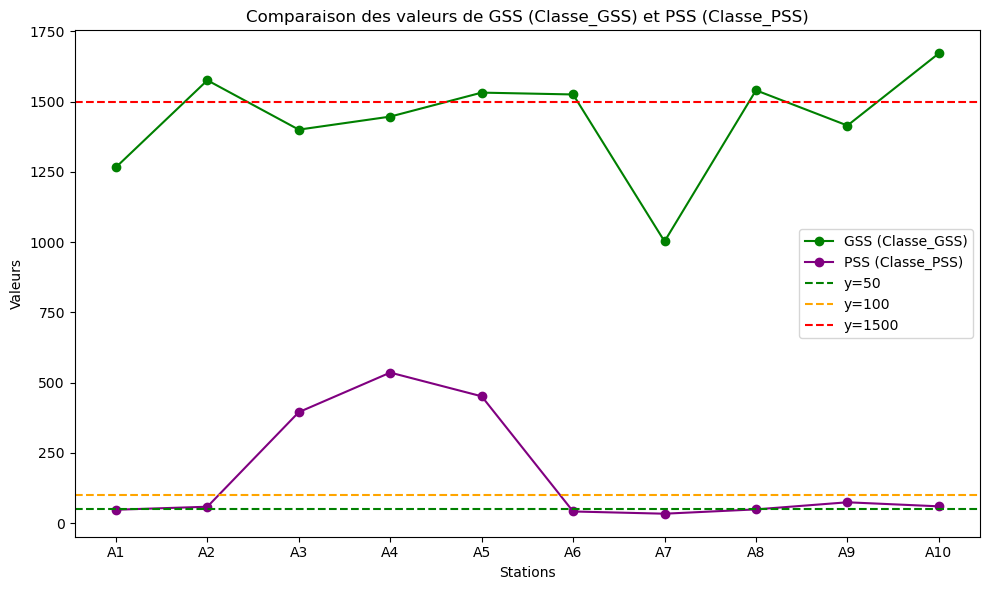

In [34]:
# Second plot comparing GSS and PSS with horizontal lines at y=100, 900, and 1800
plt.figure(figsize=(10, 6))
plt.plot(df['Stations'], df['GSS'], label='GSS (Classe_GSS)', marker='o', color='green')
plt.plot(df['Stations'], df['PSS'], label='PSS (Classe_PSS)', marker='o', color='purple')
plt.axhline(y=50, color='green', linestyle='--', label='y=50')
plt.axhline(y=100, color='orange', linestyle='--', label='y=100')
plt.axhline(y=1500, color='red', linestyle='--', label='y=1500')
plt.xlabel('Stations')
plt.ylabel('Valeurs')
plt.title('Comparaison des valeurs de GSS (Classe_GSS) et PSS (Classe_PSS)')
plt.legend()
plt.tight_layout()
plt.savefig("Comparaison_be.png", dpi=300)
plt.show()

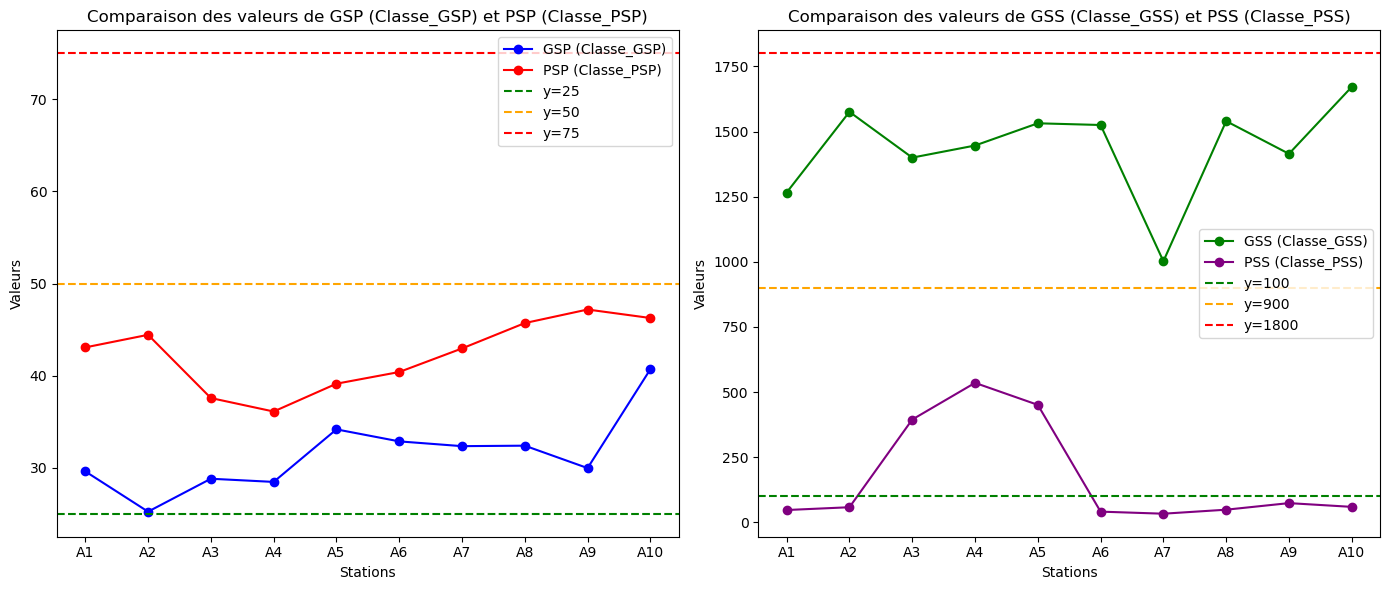

In [35]:

# Creating subplots with two columns and one row for both graphs
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First plot comparing GSP and PSP with horizontal lines at y=25, 50, and 75
axs[0].plot(df['Stations'], df['GSP'], label='GSP (Classe_GSP)', marker='o', color='blue')
axs[0].plot(df['Stations'], df['PSP'], label='PSP (Classe_PSP)', marker='o', color='red')
axs[0].axhline(y=25, color='green', linestyle='--', label='y=25')
axs[0].axhline(y=50, color='orange', linestyle='--', label='y=50')
axs[0].axhline(y=75, color='red', linestyle='--', label='y=75')
axs[0].set_xlabel('Stations')
axs[0].set_ylabel('Valeurs')
axs[0].set_title('Comparaison des valeurs de GSP (Classe_GSP) et PSP (Classe_PSP)')
axs[0].legend()

# Second plot comparing GSS and PSS with horizontal lines at y=100, 900, and 1800
axs[1].plot(df['Stations'], df['GSS'], label='GSS (Classe_GSS)', marker='o', color='green')
axs[1].plot(df['Stations'], df['PSS'], label='PSS (Classe_PSS)', marker='o', color='purple')
axs[1].axhline(y=100, color='green', linestyle='--', label='y=100')
axs[1].axhline(y=900, color='orange', linestyle='--', label='y=900')
axs[1].axhline(y=1800, color='red', linestyle='--', label='y=1800')
axs[1].set_xlabel('Stations')
axs[1].set_ylabel('Valeurs')
axs[1].set_title('Comparaison des valeurs de GSS (Classe_GSS) et PSS (Classe_PSS)')
axs[1].legend()

# Adjust layout and show
plt.tight_layout()

# Save the figure
plt.savefig("Comparaison_total.png", dpi=300)

# Show the plot
plt.show()


## Graphique avec points colorés selon la classe de qualité

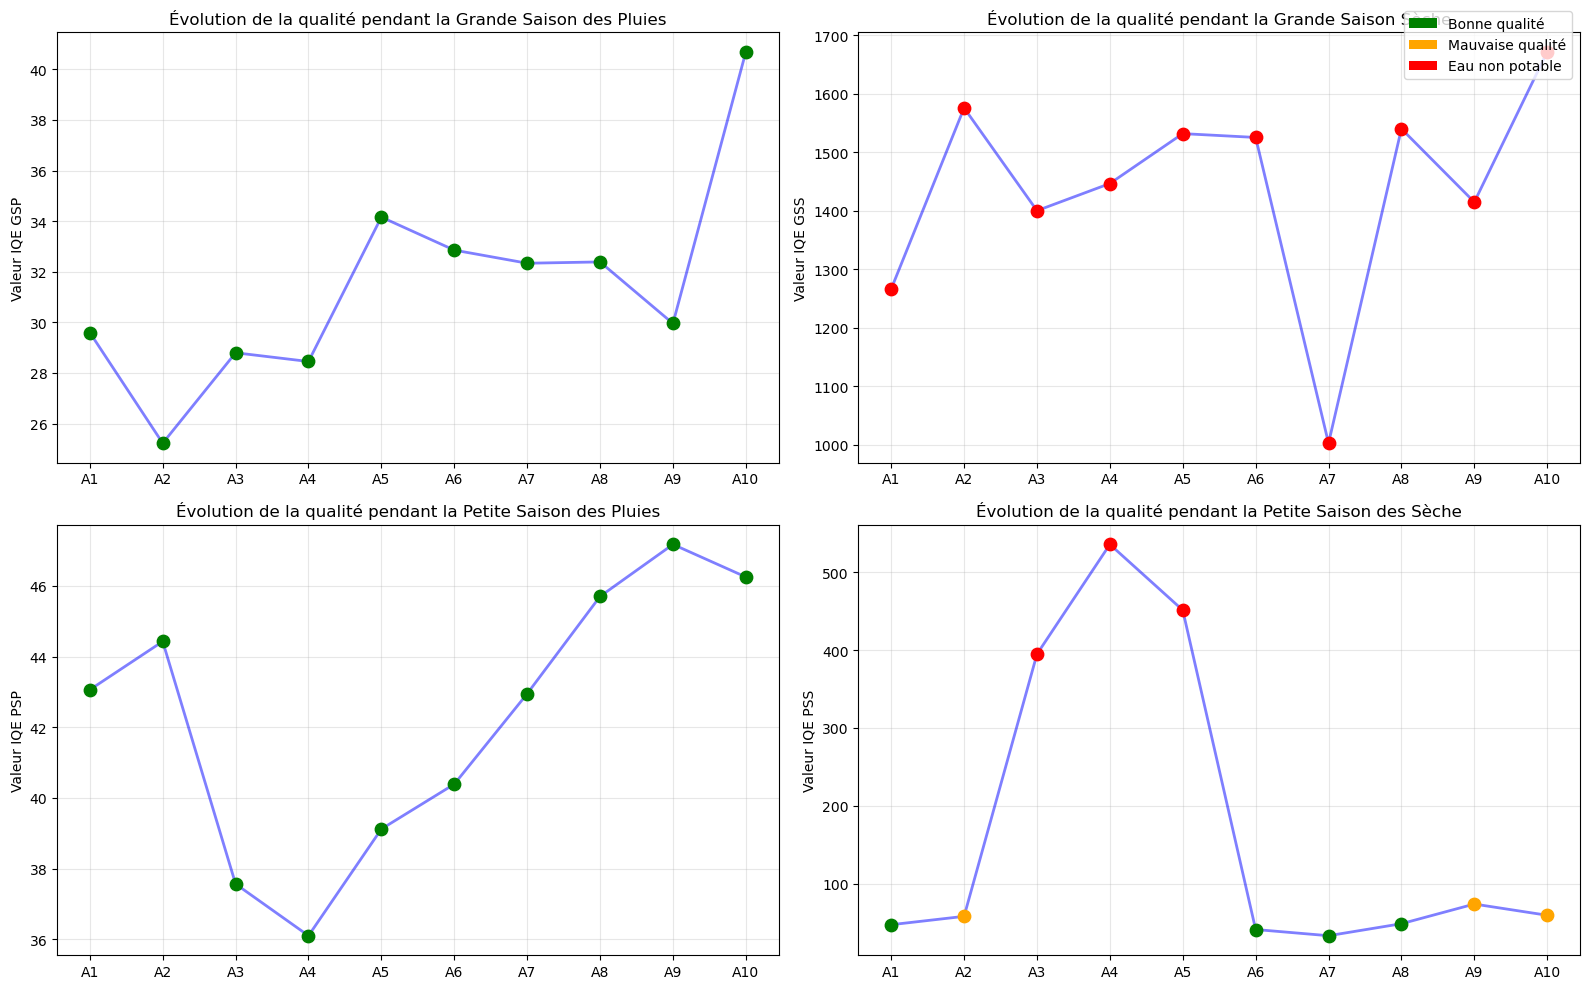

In [5]:
df = iqe
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# GSP
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'GSP_Classe']]
    axes[0,0].scatter(station, df.loc[i, 'GSP'], color=couleur, s=80, zorder=3)
axes[0,0].plot(df['Stations'], df['GSP'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[0,0].set_title('Évolution de la qualité pendant la Grande Saison des Pluies')
axes[0,0].set_ylabel('Valeur IQE GSP')
axes[0,0].grid(True, alpha=0.3)

# GSS
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'GSS_Classe']]
    axes[0,1].scatter(station, df.loc[i, 'GSS'], color=couleur, s=80, zorder=3)
axes[0,1].plot(df['Stations'], df['GSS'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[0,1].set_title('Évolution de la qualité pendant la Grande Saison Sèche')
axes[0,1].set_ylabel('Valeur IQE GSS')
axes[0,1].grid(True, alpha=0.3)

# PSP
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'PSP_Classe']]
    axes[1,0].scatter(station, df.loc[i, 'PSP'], color=couleur, s=80, zorder=3)
axes[1,0].plot(df['Stations'], df['PSP'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[1,0].set_title('Évolution de la qualité pendant la Petite Saison des Pluies')
axes[1,0].set_ylabel('Valeur IQE PSP')
axes[1,0].grid(True, alpha=0.3)

# PSS
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'PSS_Classe']]
    axes[1,1].scatter(station, df.loc[i, 'PSS'], color=couleur, s=80, zorder=3)
axes[1,1].plot(df['Stations'], df['PSS'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[1,1].set_title('Évolution de la qualité pendant la Petite Saison des Sèche')
axes[1,1].set_ylabel('Valeur IQE PSS')
axes[1,1].grid(True, alpha=0.3)

# Légende
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Bonne qualité'),
    Patch(facecolor='orange', label='Mauvaise qualité'),
    Patch(facecolor='red', label='Eau non potable')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.tight_layout()
plt.savefig("Valeurs par paramètre.png", dpi = 300)
plt.show()

In [ ]:
df = iqe
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# GSP
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'GSP_Classe']]
    axes[0,0].scatter(station, df.loc[i, 'GSP'], color=couleur, s=80, zorder=3)
axes[0,0].plot(df['Stations'], df['GSP'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[0,0].set_title('Évolution de la qualité pendant la Grande Saison des Pluies')
axes[0,0].set_ylabel('Valeur IQE GSP')
axes[0,0].grid(True, alpha=0.3)

# GSS
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'GSS_Classe']]
    axes[0,1].scatter(station, df.loc[i, 'GSS'], color=couleur, s=80, zorder=3)
axes[0,1].plot(df['Stations'], df['GSS'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[0,1].set_title('Évolution de la qualité pendant la Grande Saison Sèche')
axes[0,1].set_ylabel('Valeur IQE GSS')
axes[0,1].grid(True, alpha=0.3)

# PSP
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'PSP_Classe']]
    axes[1,0].scatter(station, df.loc[i, 'PSP'], color=couleur, s=80, zorder=3)
axes[1,0].plot(df['Stations'], df['PSP'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[1,0].set_title('Évolution de la qualité pendant la Petite Saison des Pluies')
axes[1,0].set_ylabel('Valeur IQE PSP')
axes[1,0].grid(True, alpha=0.3)

# PSS
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'PSS_Classe']]
    axes[1,1].scatter(station, df.loc[i, 'PSS'], color=couleur, s=80, zorder=3)
axes[1,1].plot(df['Stations'], df['PSS'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[1,1].set_title('Évolution de la qualité pendant la Petite Saison des Sèche')
axes[1,1].set_ylabel('Valeur IQE PSS')
axes[1,1].grid(True, alpha=0.3)

# Légende
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Bonne qualité'),
    Patch(facecolor='orange', label='Mauvaise qualité'),
    Patch(facecolor='red', label='Eau non potable')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.tight_layout()
plt.savefig("Valeurs par paramètre.png", dpi = 300)
plt.show()

## Diagramme en barres avec couleurs selon la qualité

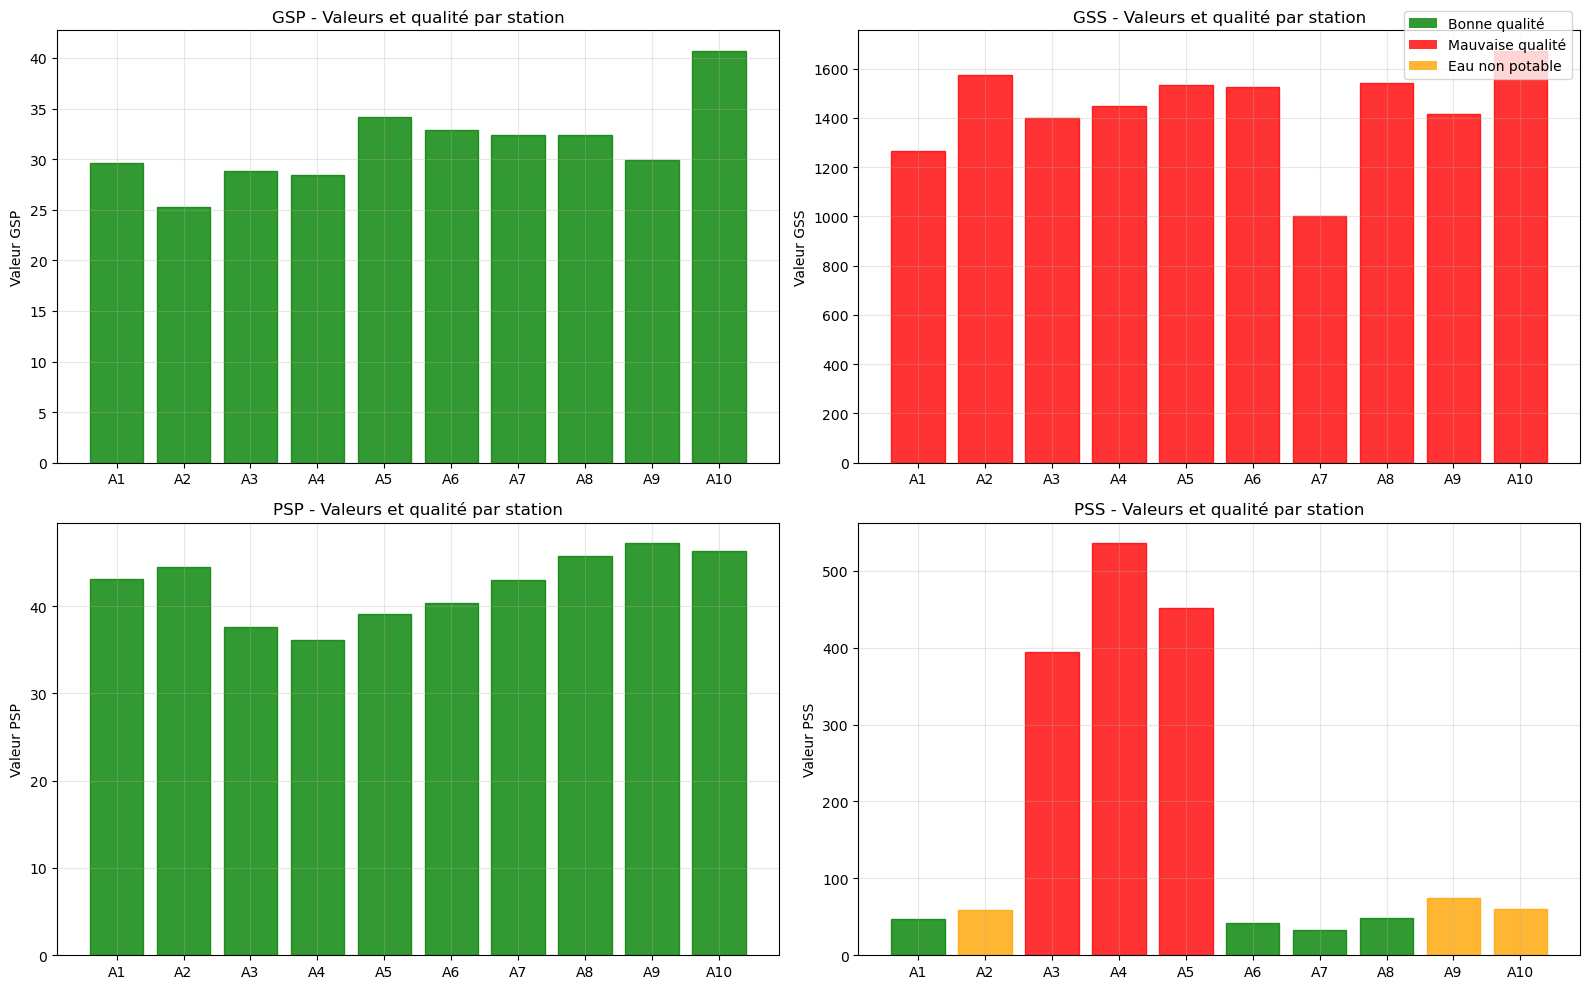

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Création des barres colorées selon la classe de qualité
for idx, (param, ax) in enumerate(zip(['GSP', 'GSS', 'PSP', 'PSS'], axes.flat)):
    bars = ax.bar(range(len(df)), df[param], color='lightgray', alpha=0.7)
    
    # Colorier chaque barre selon sa classe
    for i, bar in enumerate(bars):
        classe = df[f'{param}_Classe'].iloc[i]
        bar.set_color(couleurs_classes[classe])
        bar.set_alpha(0.8)
    
    ax.set_title(f'{param} - Valeurs et qualité par station')
    ax.set_ylabel(f'Valeur {param}')
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df['Stations'])
    ax.grid(True, alpha=0.3)

# Légende
legend_elements = [
    Patch(facecolor='green', label='Bonne qualité', alpha=0.8),
    Patch(facecolor='red', label='Mauvaise qualité', alpha=0.8),
    Patch(facecolor='orange', label='Eau non potable', alpha=0.8)
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.tight_layout()
plt.show()

## Heatmap avec annotations de qualité

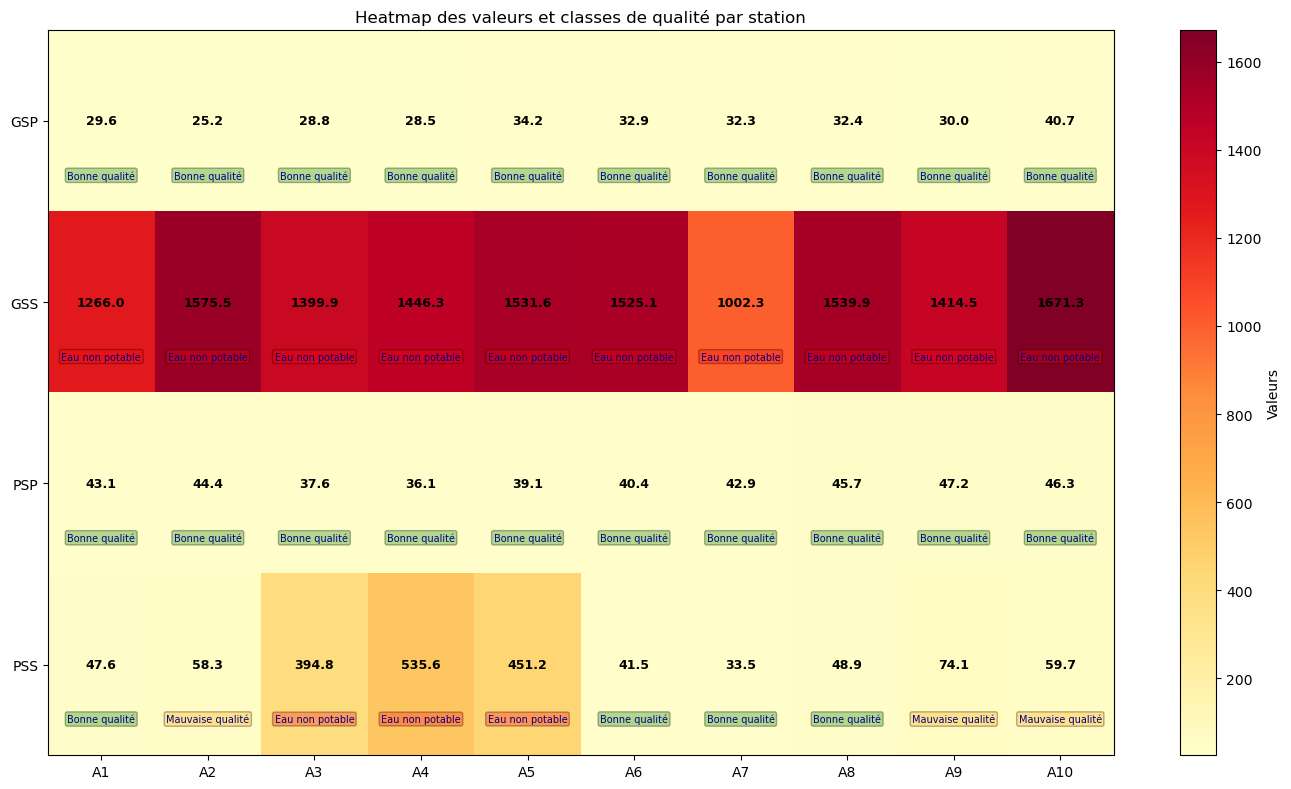

In [7]:
plt.figure(figsize=(14, 8))

# Préparation des données pour la heatmap
heatmap_data = df[['GSP', 'GSS', 'PSP', 'PSS']].values.T
classes_data = df[['GSP_Classe', 'GSS_Classe', 'PSP_Classe', 'PSS_Classe']].values.T

# Création de la heatmap
im = plt.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')

# Ajouter les valeurs et classes
for i in range(4):
    for j in range(len(df)):
        # Valeur numérique
        plt.text(j, i, f'{heatmap_data[i, j]:.1f}', 
                ha='center', va='center', color='black', fontweight='bold', fontsize=9)
        
        # Classe de qualité (sous la valeur)
        classe = classes_data[i, j]
        plt.text(j, i + 0.3, classe, 
                ha='center', va='center', color='darkblue', fontsize=7, 
                bbox=dict(boxstyle="round,pad=0.2", facecolor=couleurs_classes[classe], alpha=0.3))

plt.colorbar(im, label='Valeurs')
plt.xticks(range(len(df['Stations'])), df['Stations'])
plt.yticks(range(4), ['GSP', 'GSS', 'PSP', 'PSS'])
plt.title('Heatmap des valeurs et classes de qualité par station')
plt.tight_layout()
plt.show()

## Graphique combiné avec annotations de qualité

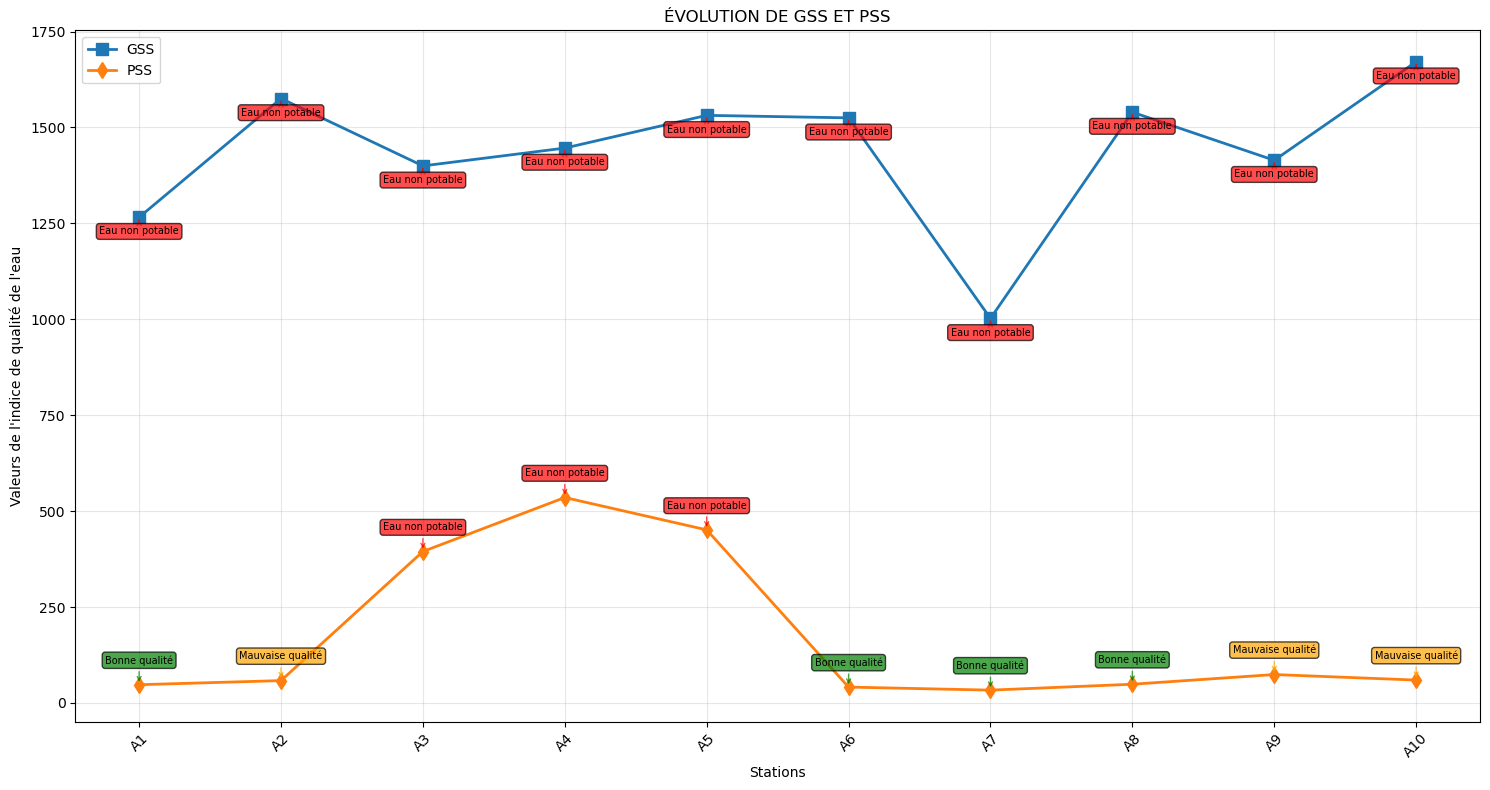

In [12]:
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame

# Figure 1: GSS and PSS plot
plt.figure(figsize=(15, 8))
plt.plot(df['Stations'], df['GSS'], 's-', label='GSS', linewidth=2, markersize=8)
plt.plot(df['Stations'], df['PSS'], 'd-', label='PSS', linewidth=2, markersize=8)

# Adding annotations
for i, station in enumerate(df['Stations']):
    offsets = [-50, 50]
    for j, (param, offset) in enumerate(zip(['GSS', 'PSS'], offsets)):
        classe = df[f'{param}_Classe'].iloc[i]
        valeur = df[param].iloc[i]
        plt.annotate(classe, 
                     xy=(i, valeur),
                     xytext=(i, valeur + offset),
                     textcoords='data',
                     ha='center',
                     va='bottom',
                     fontsize=7,
                     bbox=dict(boxstyle="round,pad=0.3", facecolor=couleurs_classes[classe], alpha=0.7),
                     arrowprops=dict(arrowstyle="->", color=couleurs_classes[classe], alpha=0.7))

plt.title("ÉVOLUTION DE GSS ET PSS")
plt.xlabel('Stations')
plt.ylabel("Valeurs de l'indice de qualité de l'eau")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("GSS_PSS_Evolution.png", dpi=300)
plt.show()



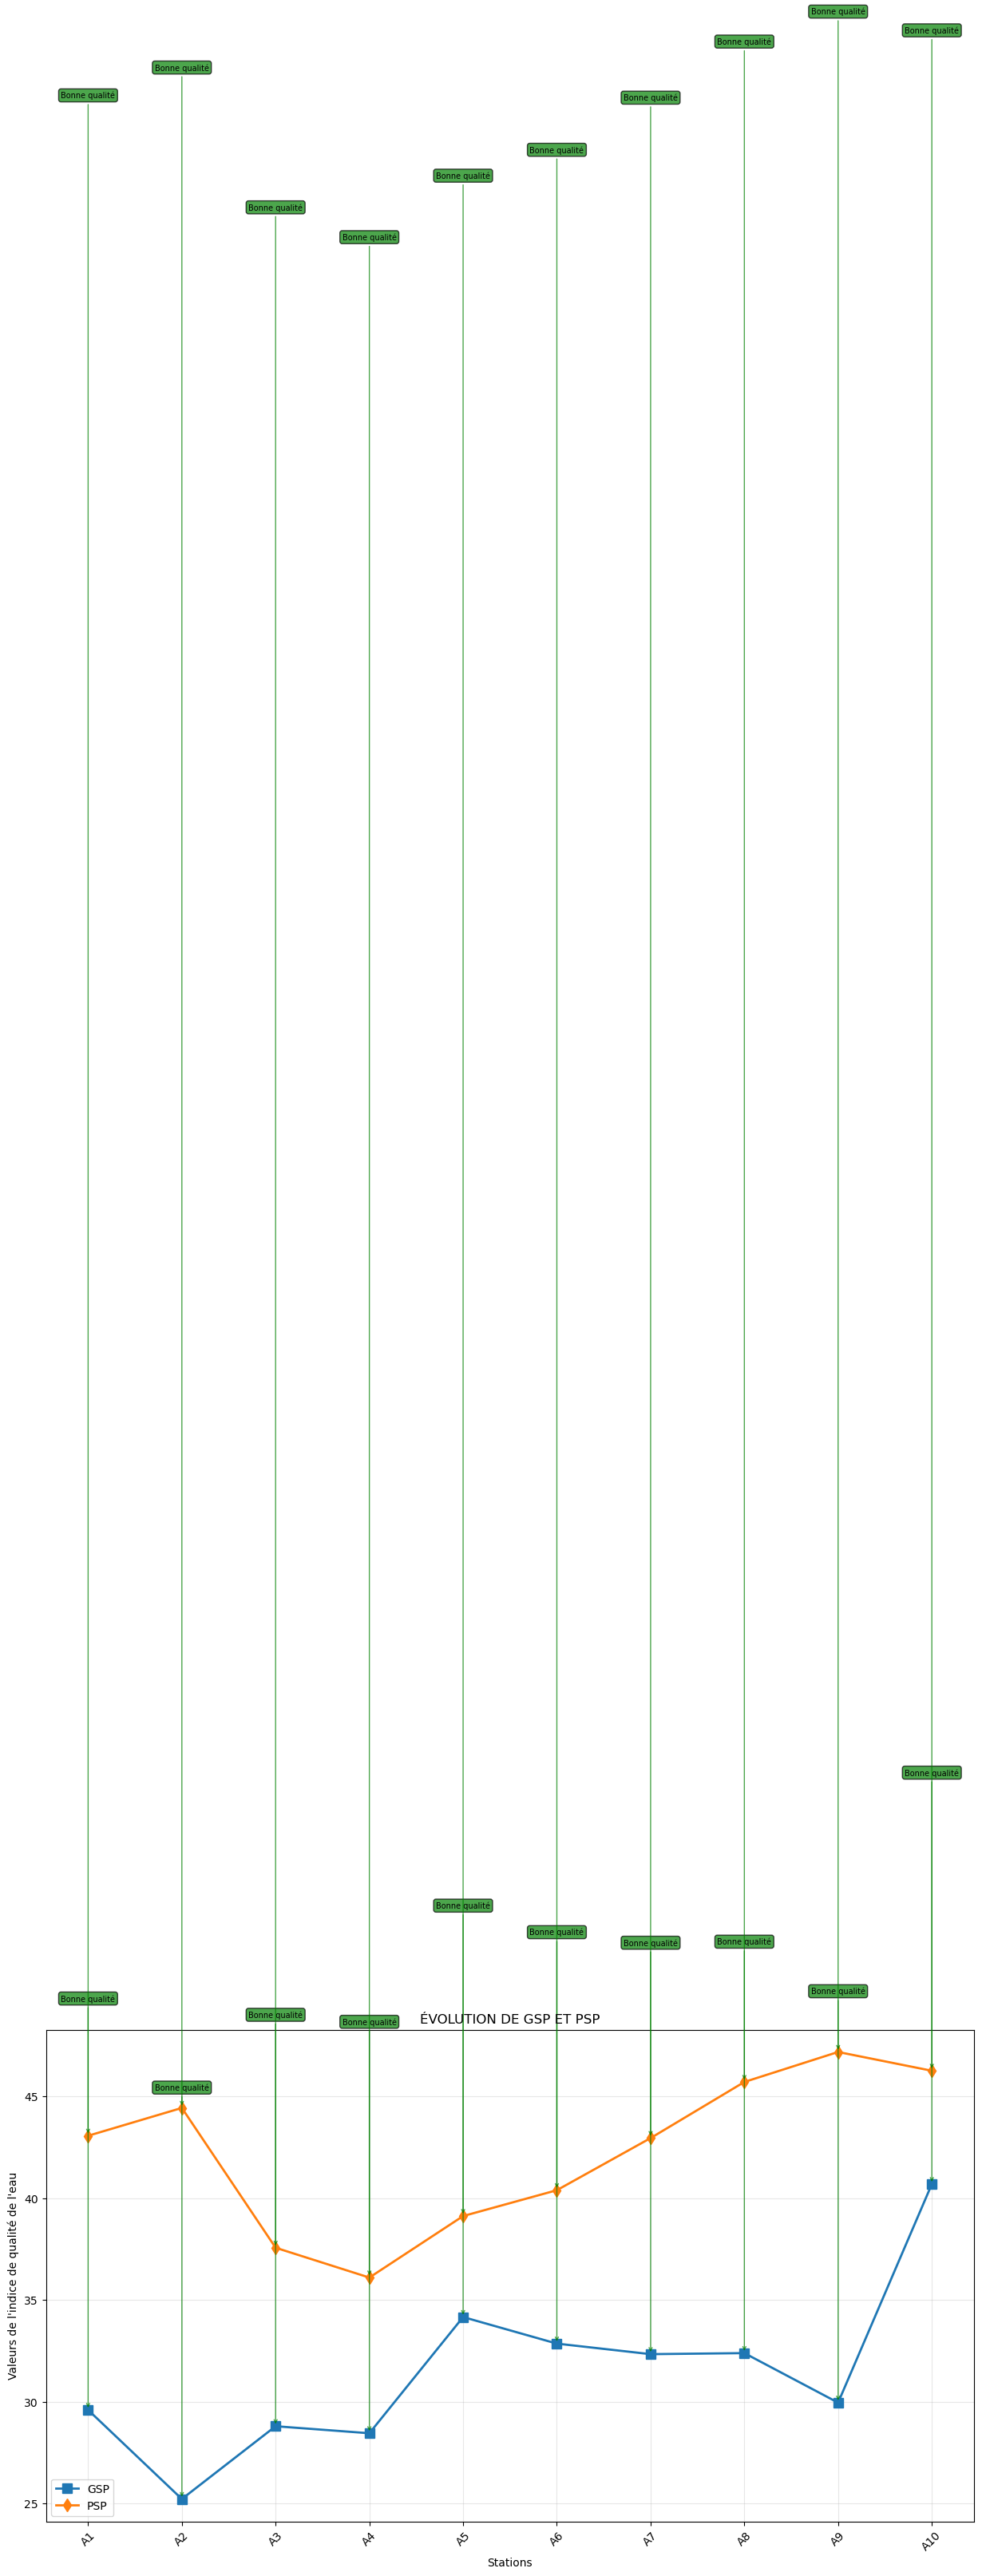

In [19]:
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame

# Figure 1: GSS and PSS plot
plt.figure(figsize=(15, 8))
plt.plot(df['Stations'], df['GSP'], 's-', label='GSP', linewidth=2, markersize=8)
plt.plot(df['Stations'], df['PSP'], 'd-', label='PSP', linewidth=2, markersize=8)

# Adding annotations
for i, station in enumerate(df['Stations']):
    offsets = [20, 100]
    for j, (param, offset) in enumerate(zip(['GSP', 'PSP'], offsets)):
        classe = df[f'{param}_Classe'].iloc[i]
        valeur = df[param].iloc[i]
        plt.annotate(classe, 
                     xy=(i, valeur),
                     xytext=(i, valeur + offset),
                     textcoords='data',
                     ha='center',
                     va='bottom',
                     fontsize=7,
                     bbox=dict(boxstyle="round,pad=0.3", facecolor=couleurs_classes[classe], alpha=0.7),
                     arrowprops=dict(arrowstyle="->", color=couleurs_classes[classe], alpha=0.7))

plt.title("ÉVOLUTION DE GSP ET PSP")
plt.xlabel('Stations')
plt.ylabel("Valeurs de l'indice de qualité de l'eau")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("GSP_PSP_Evolution.png", dpi=300)
plt.show()

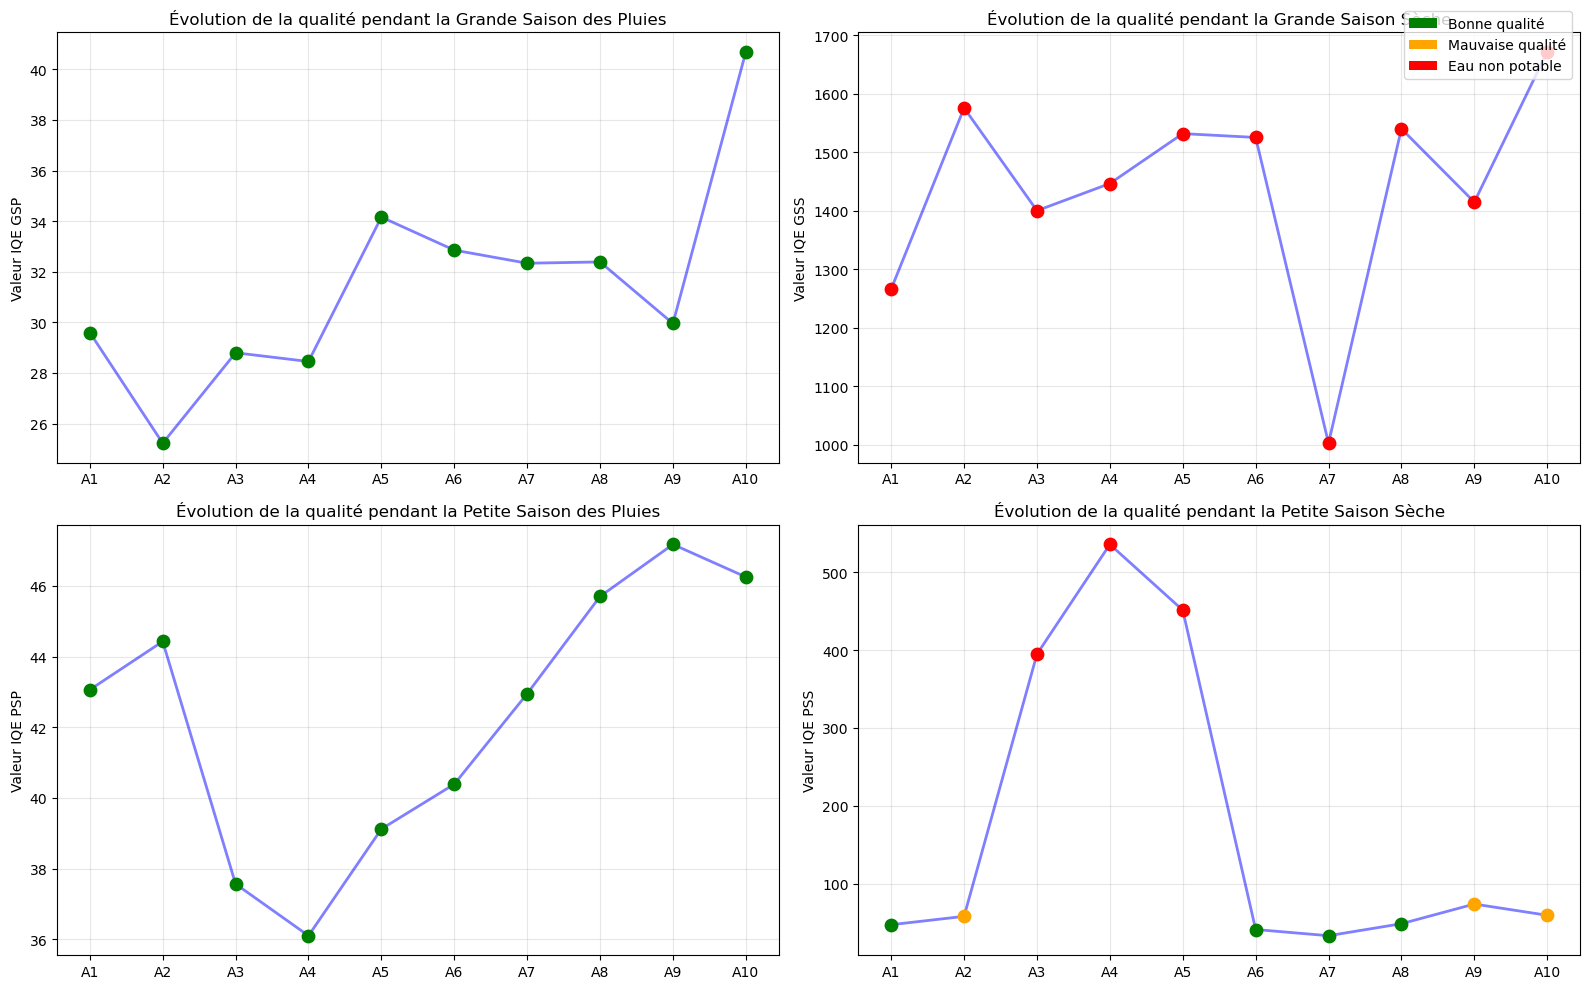

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Supposons que df est déjà défini et que 'couleurs_classes' est une variable contenant les couleurs pour chaque classe

# Création de la figure et des sous-graphes
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# GSP (Grande Saison des Pluies)
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'GSP_Classe']]
    axes[0, 0].scatter(station, df.loc[i, 'GSP'], color=couleur, s=80, zorder=3)
axes[0, 0].plot(df['Stations'], df['GSP'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[0, 0].set_title('Évolution de la qualité pendant la Grande Saison des Pluies')
axes[0, 0].set_ylabel('Valeur IQE GSP')
axes[0, 0].grid(True, alpha=0.3)

# GSS (Grande Saison Sèche)
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'GSS_Classe']]
    axes[0, 1].scatter(station, df.loc[i, 'GSS'], color=couleur, s=80, zorder=3)
axes[0, 1].plot(df['Stations'], df['GSS'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[0, 1].set_title('Évolution de la qualité pendant la Grande Saison Sèche')
axes[0, 1].set_ylabel('Valeur IQE GSS')
axes[0, 1].grid(True, alpha=0.3)

# PSP (Petite Saison des Pluies)
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'PSP_Classe']]
    axes[1, 0].scatter(station, df.loc[i, 'PSP'], color=couleur, s=80, zorder=3)
axes[1, 0].plot(df['Stations'], df['PSP'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[1, 0].set_title('Évolution de la qualité pendant la Petite Saison des Pluies')
axes[1, 0].set_ylabel('Valeur IQE PSP')
axes[1, 0].grid(True, alpha=0.3)

# PSS (Petite Saison Sèche)
for i, station in enumerate(df['Stations']):
    couleur = couleurs_classes[df.loc[i, 'PSS_Classe']]
    axes[1, 1].scatter(station, df.loc[i, 'PSS'], color=couleur, s=80, zorder=3)
axes[1, 1].plot(df['Stations'], df['PSS'], 'gray', alpha=0.5, linewidth=2, markersize=6, color='blue')
axes[1, 1].set_title('Évolution de la qualité pendant la Petite Saison Sèche')
axes[1, 1].set_ylabel('Valeur IQE PSS')
axes[1, 1].grid(True, alpha=0.3)

# Légende
legend_elements = [
    Patch(facecolor='green', label='Bonne qualité'),
    Patch(facecolor='orange', label='Mauvaise qualité'),
    Patch(facecolor='red', label='Eau non potable')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 0.99))

# Ajuster l'espacement et afficher l'image
plt.tight_layout()
plt.savefig("Valeurs par paramètre.png", dpi=300)
plt.show()


In [ ]:
plt.figure(figsize=(15, 8))

# Tracer les 4 paramètres
plt.plot(df['Stations'], df['GSP'], 'o-', label='GSP', linewidth=2, markersize=8)
plt.plot(df['Stations'], df['GSS'], 's-', label='GSS', linewidth=2, markersize=8)
plt.plot(df['Stations'], df['PSP'], '^-', label='PSP', linewidth=2, markersize=8)
plt.plot(df['Stations'], df['PSS'], 'd-', label='PSS', linewidth=2, markersize=8)

# Ajouter les annotations de qualité
for i, station in enumerate(df['Stations']):
    # Décalage vertical pour éviter le chevauchement
    offsets = [-50, 50, -30, 30]
    
    for j, (param, offset) in enumerate(zip(['GSP', 'GSS', 'PSP', 'PSS'], offsets)):
        classe = df[f'{param}_Classe'].iloc[i]
        valeur = df[param].iloc[i]
        
        plt.annotate(classe, 
                    xy=(i, valeur),
                    xytext=(i, valeur + offset),
                    textcoords='data',
                    ha='center',
                    va='bottom',
                    fontsize=7,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor=couleurs_classes[classe], alpha=0.7),
                    arrowprops=dict(arrowstyle="->", color=couleurs_classes[classe], alpha=0.7))

plt.title("ÉVOLUTION DES PARAMETRES DE QUALITE DE L'EAU AVEC CLASSES DE QUALITE")
plt.xlabel('Stations')
plt.ylabel("VALEURS DE L'INDICE DE QUALITE DE L'EAU")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Évolution des valeurs par paramètre par classe.png", dpi = 300)
plt.show()

## Tableau récapitulatif avec mise en forme

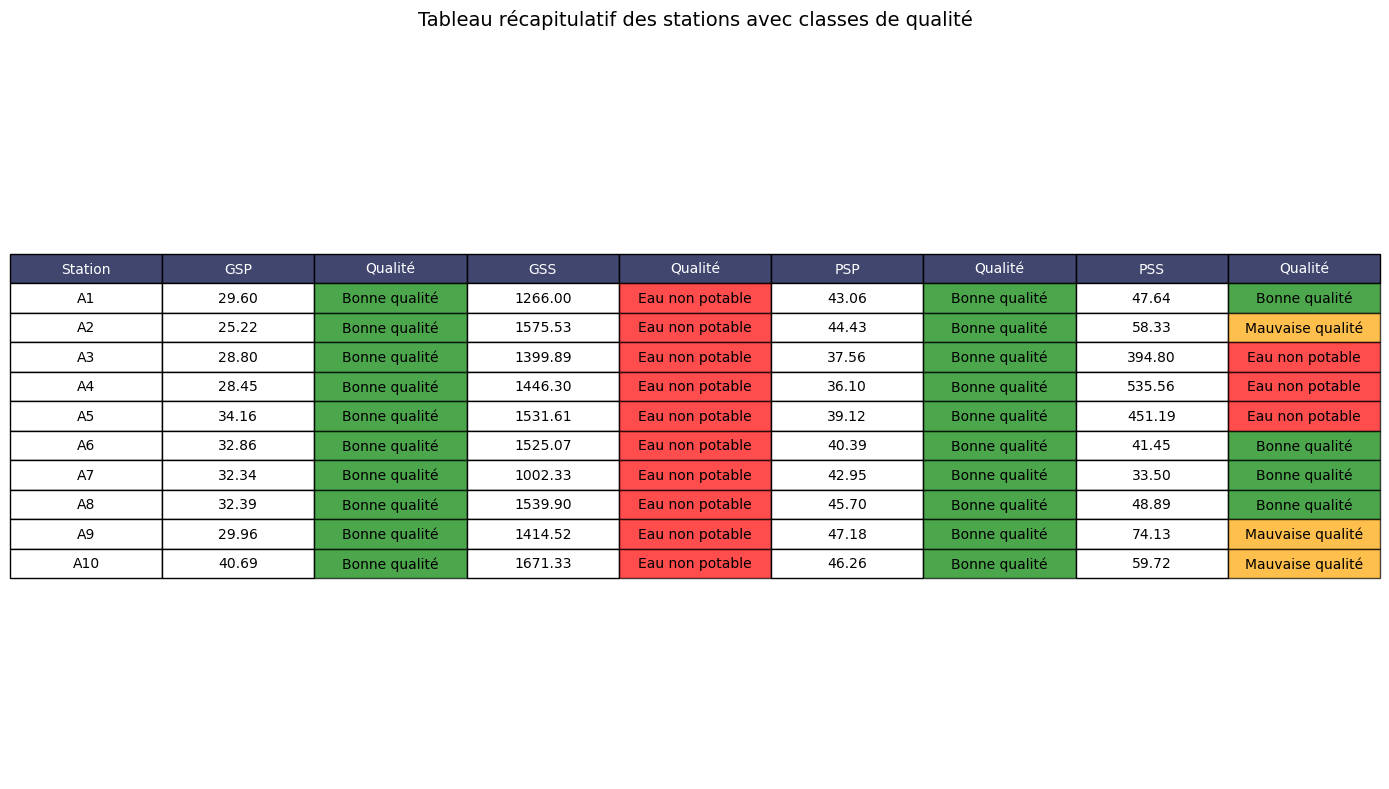

In [9]:
# Création d'un tableau stylisé
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('tight')
ax.axis('off')

# Préparation des données pour le tableau
table_data = []
for i in range(len(df)):
    row = [df['Stations'].iloc[i]]
    for param in ['GSP', 'GSS', 'PSP', 'PSS']:
        valeur = f"{df[param].iloc[i]:.2f}"
        classe = df[f'{param}_Classe'].iloc[i]
        row.extend([valeur, classe])
    table_data.append(row)

# En-têtes
columns = ['Station', 'GSP', 'Qualité', 'GSS', 'Qualité', 'PSP', 'Qualité', 'PSS', 'Qualité']

# Création du tableau avec couleurs
table = ax.table(cellText=table_data,
                colLabels=columns,
                cellLoc='center',
                loc='center')

# Style du tableau
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Colorier les cellules selon la qualité
for i in range(1, len(table_data) + 1):
    for j in [2, 4, 6, 8]:  # Colonnes de qualité
        classe = table_data[i-1][j]
        table[(i, j)].set_facecolor(couleurs_classes[classe])
        table[(i, j)].set_alpha(0.7)

# Colorier l'en-tête
for j in range(len(columns)):
    table[(0, j)].set_facecolor('#40466e')
    table[(0, j)].set_text_props(color='white')

plt.title('Tableau récapitulatif des stations avec classes de qualité', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## Graphique 1 : Évolution des valeurs par paramètre

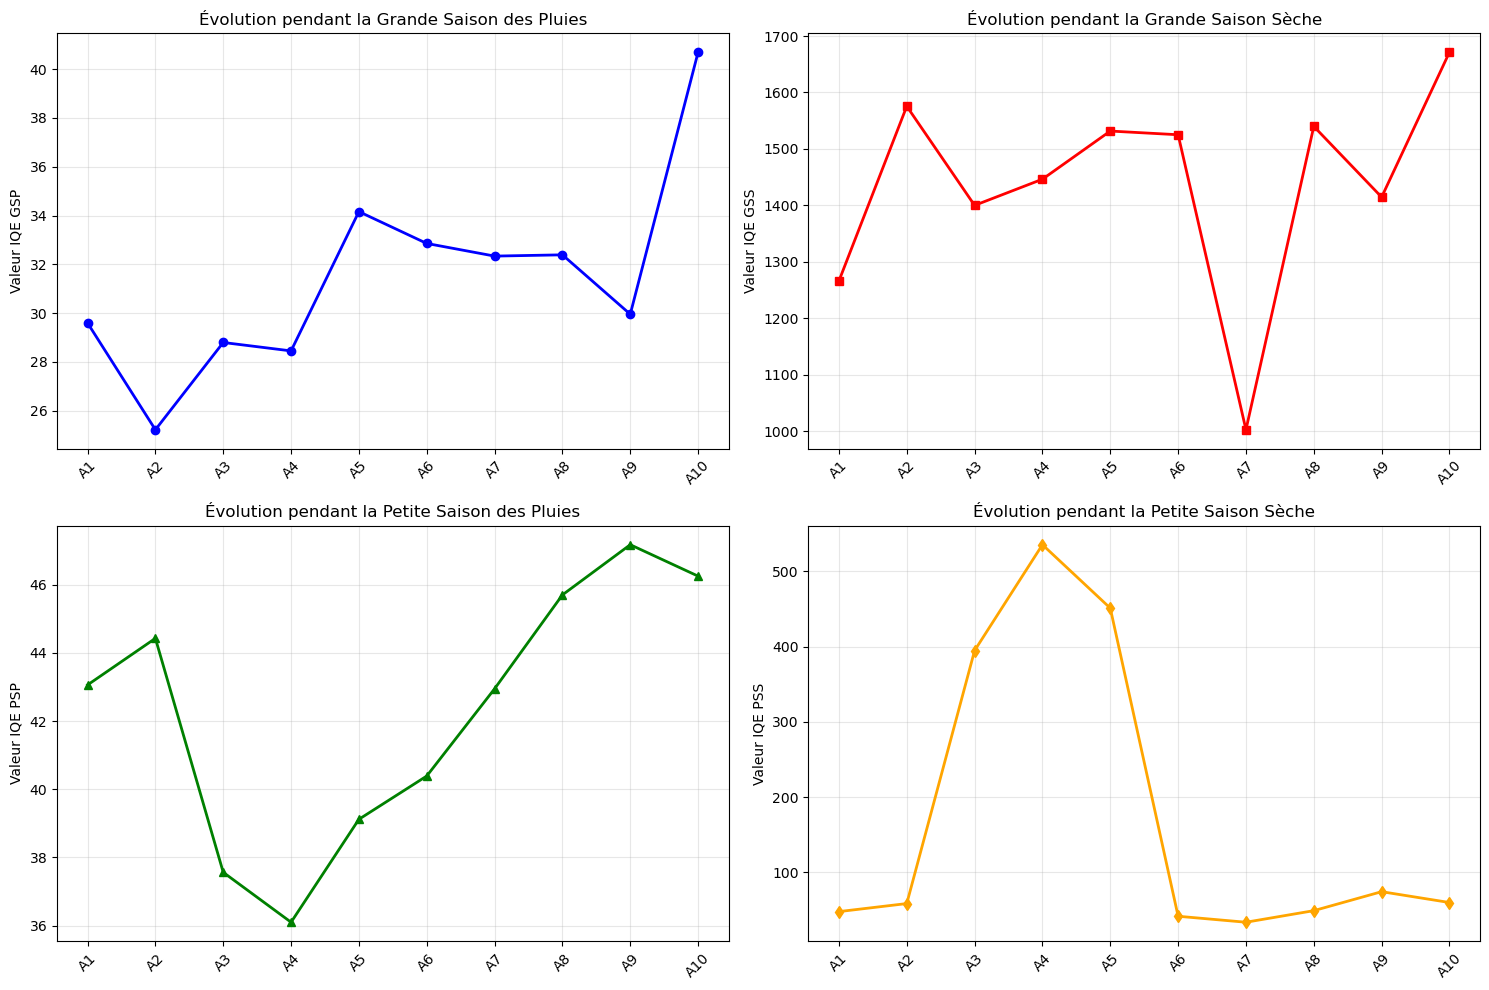

In [10]:
plt.figure(figsize=(15, 10))

# GSP
plt.subplot(2, 2, 1)
plt.plot(iqe['Stations'], iqe["GSP"], marker='o', linewidth=2, markersize=6, color='blue')
plt.title('Évolution pendant la Grande Saison des Pluies')
plt.ylabel('Valeur IQE GSP')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# GSS
plt.subplot(2, 2, 2)
plt.plot(iqe['Stations'], iqe['GSS'], marker='s', linewidth=2, markersize=6, color='red')
plt.title('Évolution pendant la Grande Saison Sèche')
plt.ylabel('Valeur IQE GSS')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# PSP
plt.subplot(2, 2, 3)
plt.plot(iqe['Stations'], iqe['PSP'], marker='^', linewidth=2, markersize=6, color='green')
plt.title('Évolution pendant la Petite Saison des Pluies')
plt.ylabel('Valeur IQE PSP')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# PSS
plt.subplot(2, 2, 4)
plt.plot(iqe['Stations'], iqe['PSS'], marker='d', linewidth=2, markersize=6, color='orange')
plt.title('Évolution pendant la Petite Saison Sèche')
plt.ylabel('Valeur IQE PSS')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Évolution des valeurs par paramètre.png", dpi = 300)
plt.show()

## Graphique 2 : Comparaison des 4 paramètres sur le même graphique

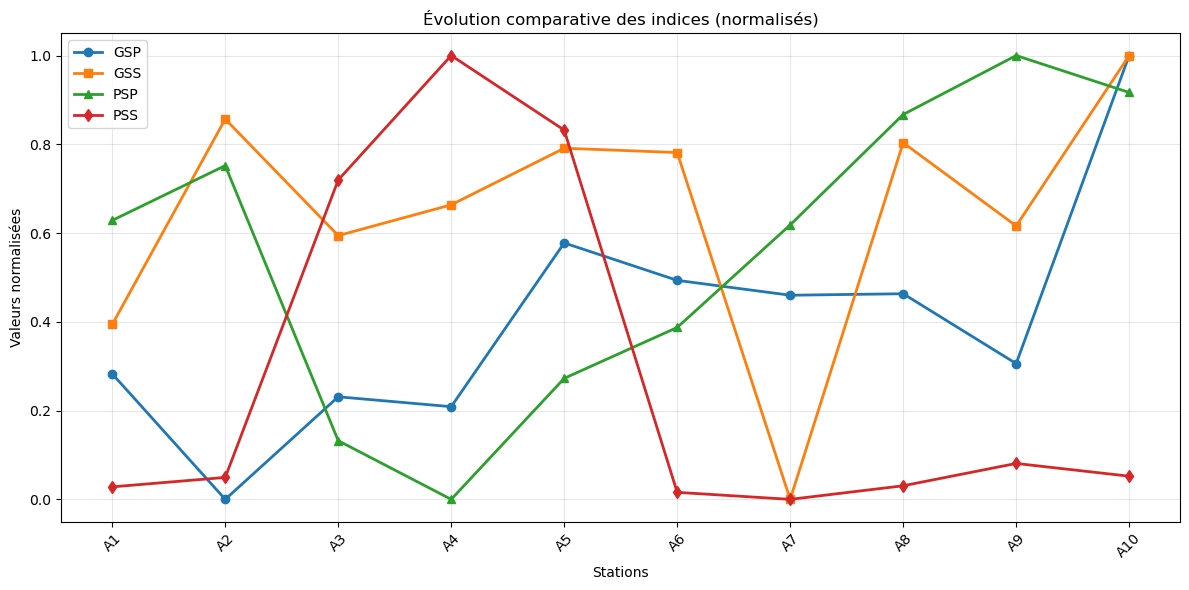

In [11]:
plt.figure(figsize=(12, 6))

# Normalisation pour mieux comparer les échelles différentes
df_normalized = iqe.copy()
for col in ['GSP', 'GSS', 'PSP', 'PSS']:
    df_normalized[col] = (iqe[col] - iqe[col].min()) / (iqe[col].max() - iqe[col].min())

plt.plot(df_normalized['Stations'], df_normalized['GSP'], marker='o', label='GSP', linewidth=2)
plt.plot(df_normalized['Stations'], df_normalized['GSS'], marker='s', label='GSS', linewidth=2)
plt.plot(df_normalized['Stations'], df_normalized['PSP'], marker='^', label='PSP', linewidth=2)
plt.plot(df_normalized['Stations'], df_normalized['PSS'], marker='d', label='PSS', linewidth=2)

plt.title('Évolution comparative des indices (normalisés)')
plt.xlabel('Stations')
plt.ylabel('Valeurs normalisées')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Comparaison des 4 paramètres sur le même graphique.png", dpi = 300)
plt.show()

## Graphique 3 : Diagramme en barres groupées

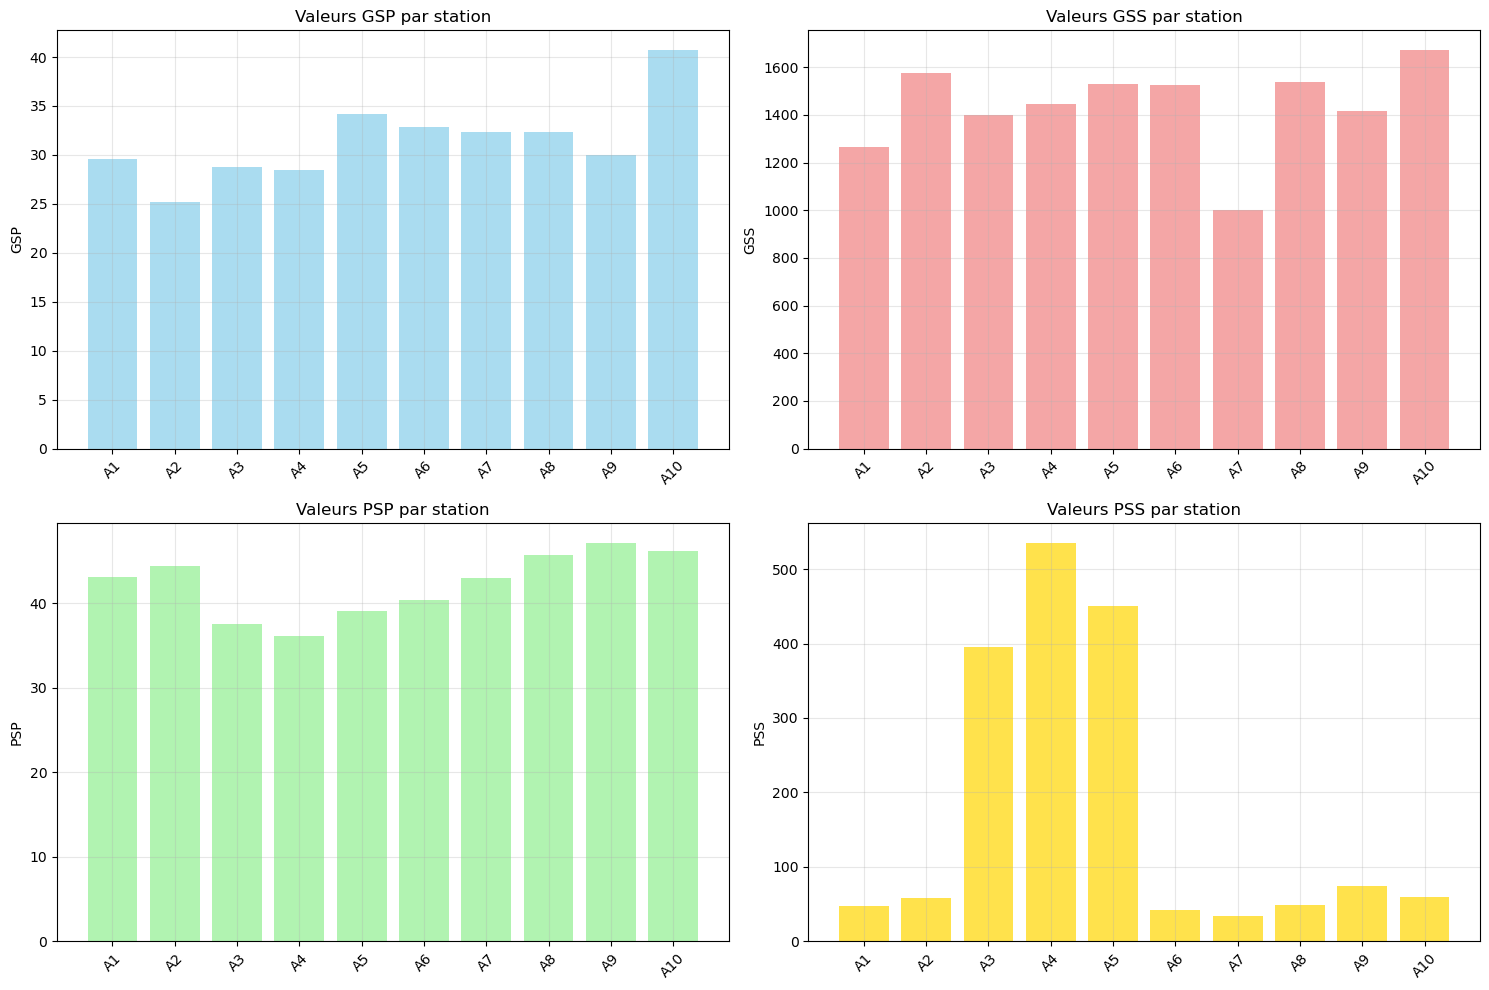

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Diagramme en barres pour chaque paramètre
axes[0,0].bar(iqe['Stations'], iqe['GSP'], color='skyblue', alpha=0.7)
axes[0,0].set_title('Valeurs GSP par station')
axes[0,0].set_ylabel('GSP')

axes[0,1].bar(iqe['Stations'], iqe['GSS'], color='lightcoral', alpha=0.7)
axes[0,1].set_title('Valeurs GSS par station')
axes[0,1].set_ylabel('GSS')

axes[1,0].bar(iqe['Stations'], iqe['PSP'], color='lightgreen', alpha=0.7)
axes[1,0].set_title('Valeurs PSP par station')
axes[1,0].set_ylabel('PSP')

axes[1,1].bar(iqe['Stations'], iqe['PSS'], color='gold', alpha=0.7)
axes[1,1].set_title('Valeurs PSS par station')
axes[1,1].set_ylabel('PSS')

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("Diagramme en barres groupées.png", dpi = 300)
plt.show()

## Graphique 4 : Heatmap des valeurs

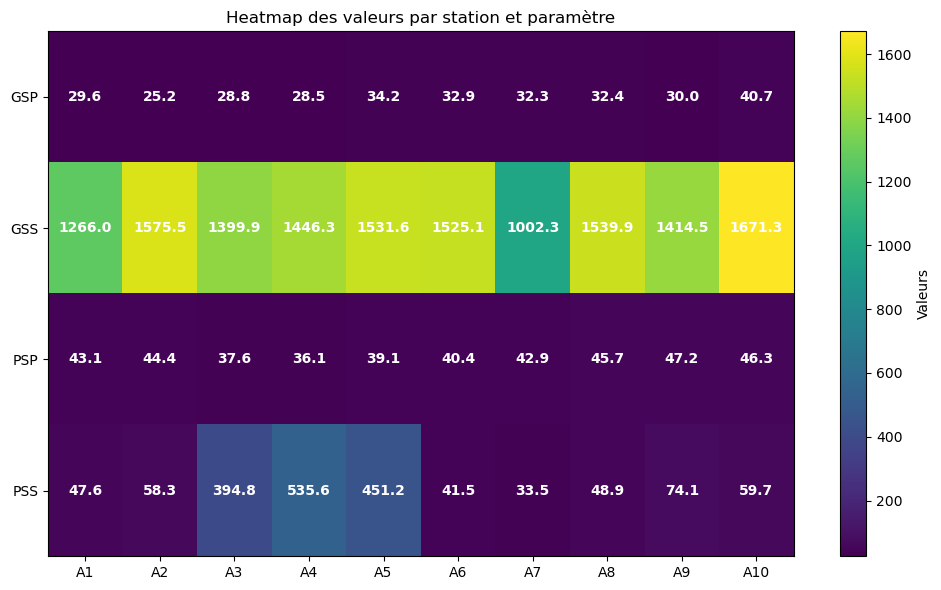

In [13]:
plt.figure(figsize=(10, 6))

# Préparation des données pour la heatmap
heatmap_data = iqe[['GSP', 'GSS', 'PSP', 'PSS']].values.T

plt.imshow(heatmap_data, cmap='viridis', aspect='auto')
plt.colorbar(label='Valeurs')
plt.xticks(range(len(iqe['Stations'])), iqe['Stations'])
plt.yticks(range(4), ['GSP', 'GSS', 'PSP', 'PSS'])
plt.title('Heatmap des valeurs par station et paramètre')

# Ajouter les valeurs sur la heatmap
for i in range(4):
    for j in range(len(iqe['Stations'])):
        plt.text(j, i, f'{heatmap_data[i, j]:.1f}', 
                ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.savefig("Heatmap des valeurs par station et paramètre.png", dpi = 300)
plt.show()

## Graphique 5 : Radar chart pour comparer les stations

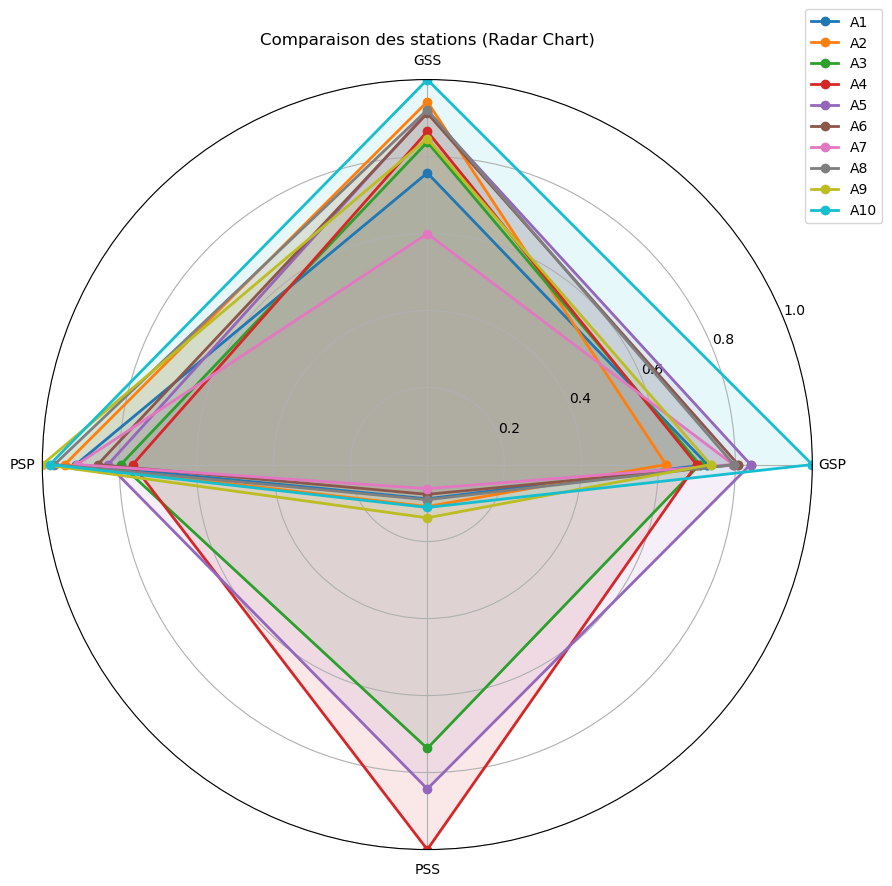

In [14]:
from math import pi

# Préparation des données pour le radar chart
categories = ['GSP', 'GSS', 'PSP', 'PSS']
N = len(categories)

# Normalisation
values_normalized = []
for i in range(len(iqe)):
    station_values = [iqe.iloc[i][cat] for cat in categories]
    max_vals = [iqe[cat].max() for cat in categories]
    normalized = [val/max_val for val, max_val in zip(station_values, max_vals)]
    values_normalized.append(normalized)

# Création du radar chart
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

# Angles pour chaque catégorie
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Fermer le cercle

# Plot pour chaque station
colors = plt.cm.tab10(np.linspace(0, 1, len(iqe)))
for i, (station, color) in enumerate(zip(iqe['Stations'], colors)):
    values = values_normalized[i] + values_normalized[i][:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=station, color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

# Configuration
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 1)
plt.title('Comparaison des stations (Radar Chart)')
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.savefig("Radar chart pour comparer les stations.png", dpi = 300)
plt.show()

## Version avec analyse statistique

Statistiques descriptives:
             GSP          GSS        PSP         PSS
count  10.000000    10.000000  10.000000   10.000000
mean   31.445709  1437.249298  42.274889  174.521398
std     4.174219   189.015428   3.818336  200.459360
min    25.223354  1002.330799  36.098678   33.501251
25%    28.997497  1403.552088  39.436758   47.948633
50%    31.146165  1485.686445  43.005865   59.026746
75%    32.738709  1537.831248  45.385851  314.632659
max    40.690044  1671.326053  47.177314  535.561355


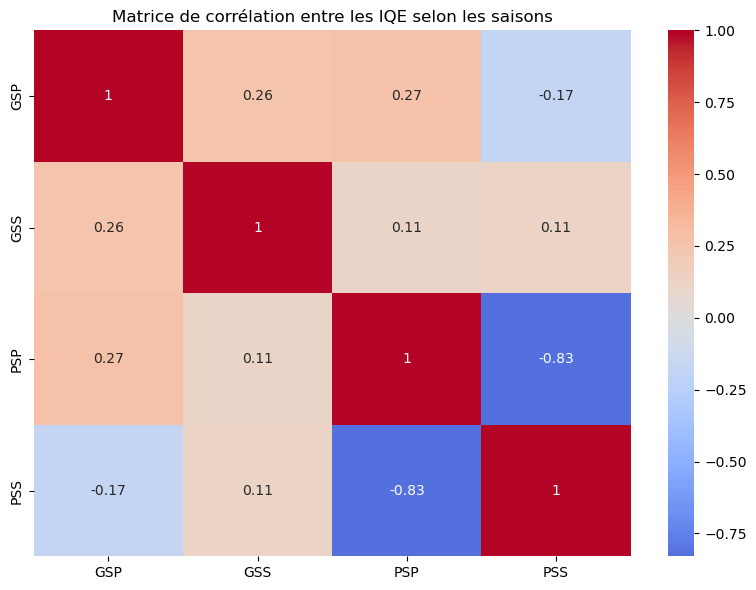

In [15]:
# Statistiques descriptives
print("Statistiques descriptives:")
print(iqe[['GSP', 'GSS', 'PSP', 'PSS']].describe())

# Corrélations
plt.figure(figsize=(8, 6))
correlation_matrix = iqe[['GSP', 'GSS', 'PSP', 'PSS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation entre les IQE selon les saisons')
plt.tight_layout()
plt.savefig("Matrice de corrélation entre les IQE.png", dpi = 300)
plt.show()

# Conseil canadien des ministres de l'environnement (CCME) IQE

In [16]:
ccme

,Stations,IQE CCME,Classe de qualité
0,A1,52.061477,Médiocre
1,A2,48.604883,Médiocre
2,A3,51.451105,Médiocre
3,A4,51.221435,Médiocre
4,A5,51.797813,Médiocre
5,A6,51.637336,Médiocre
6,A7,52.354645,Médiocre
7,A8,49.806718,Médiocre
8,A9,46.336724,Médiocre
9,A10,44.733121,Mauvaise


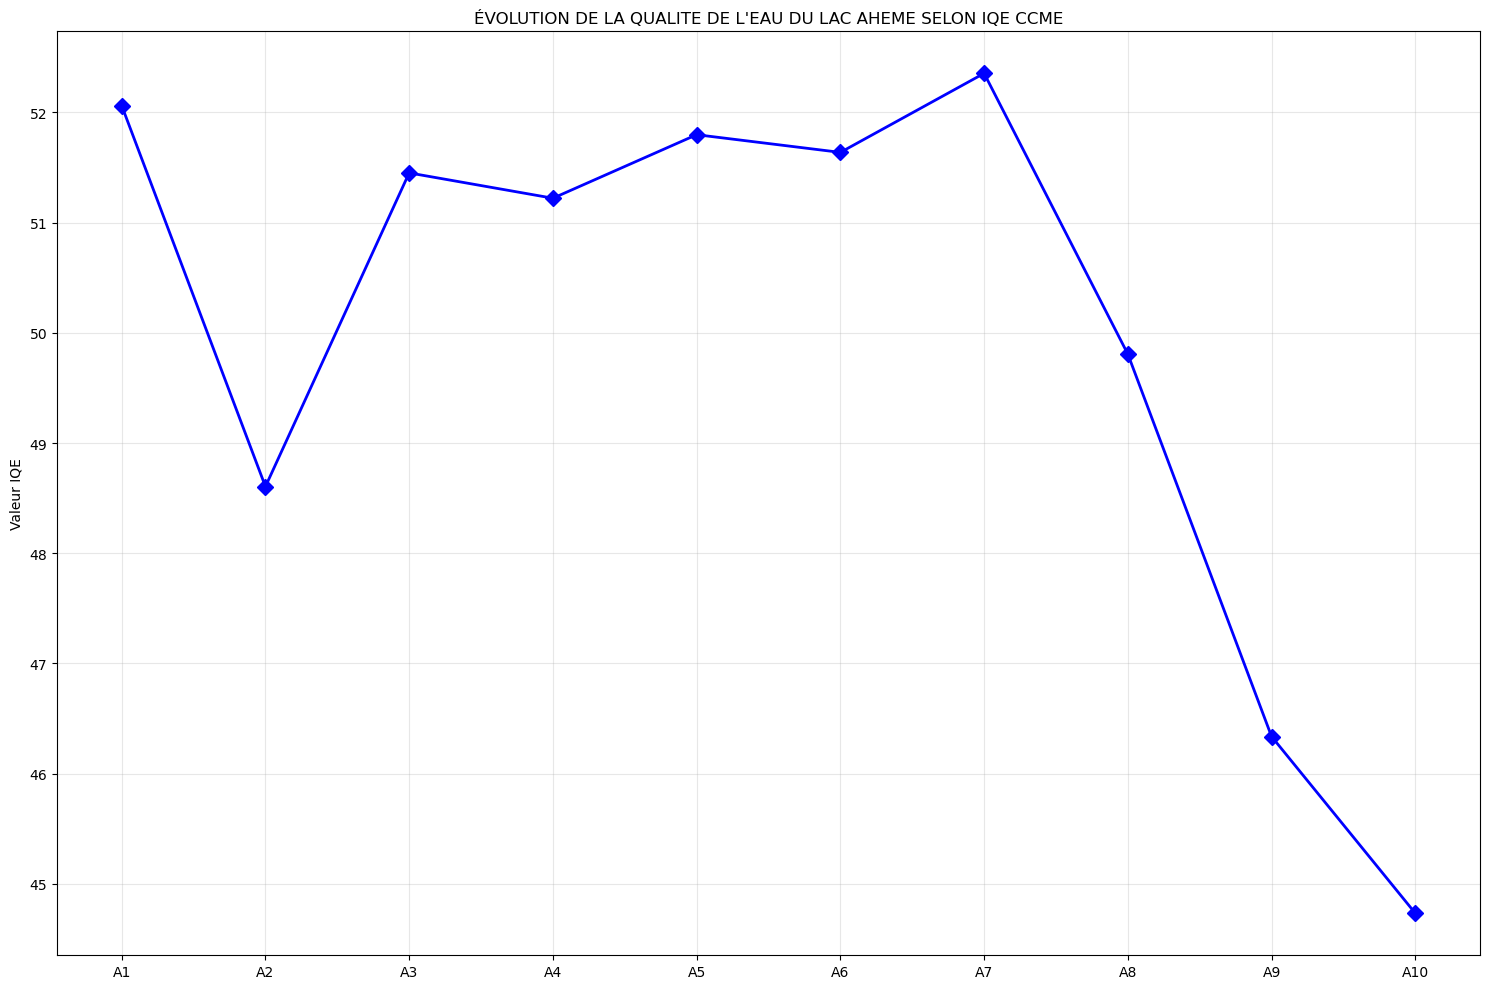

In [21]:
plt.figure(figsize=(15, 10))

# GSP
#plt.subplot(2, 2, 1)
plt.plot(ccme["Stations"], ccme["IQE CCME"], marker='D', linewidth=2, markersize=8, color='blue')
plt.title("ÉVOLUTION DE LA QUALITE DE L'EAU DU LAC AHEME SELON IQE CCME")
plt.ylabel('Valeur IQE')
plt.grid(True, alpha=0.3)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("indice ccme.png", dpi = 300)
plt.show()

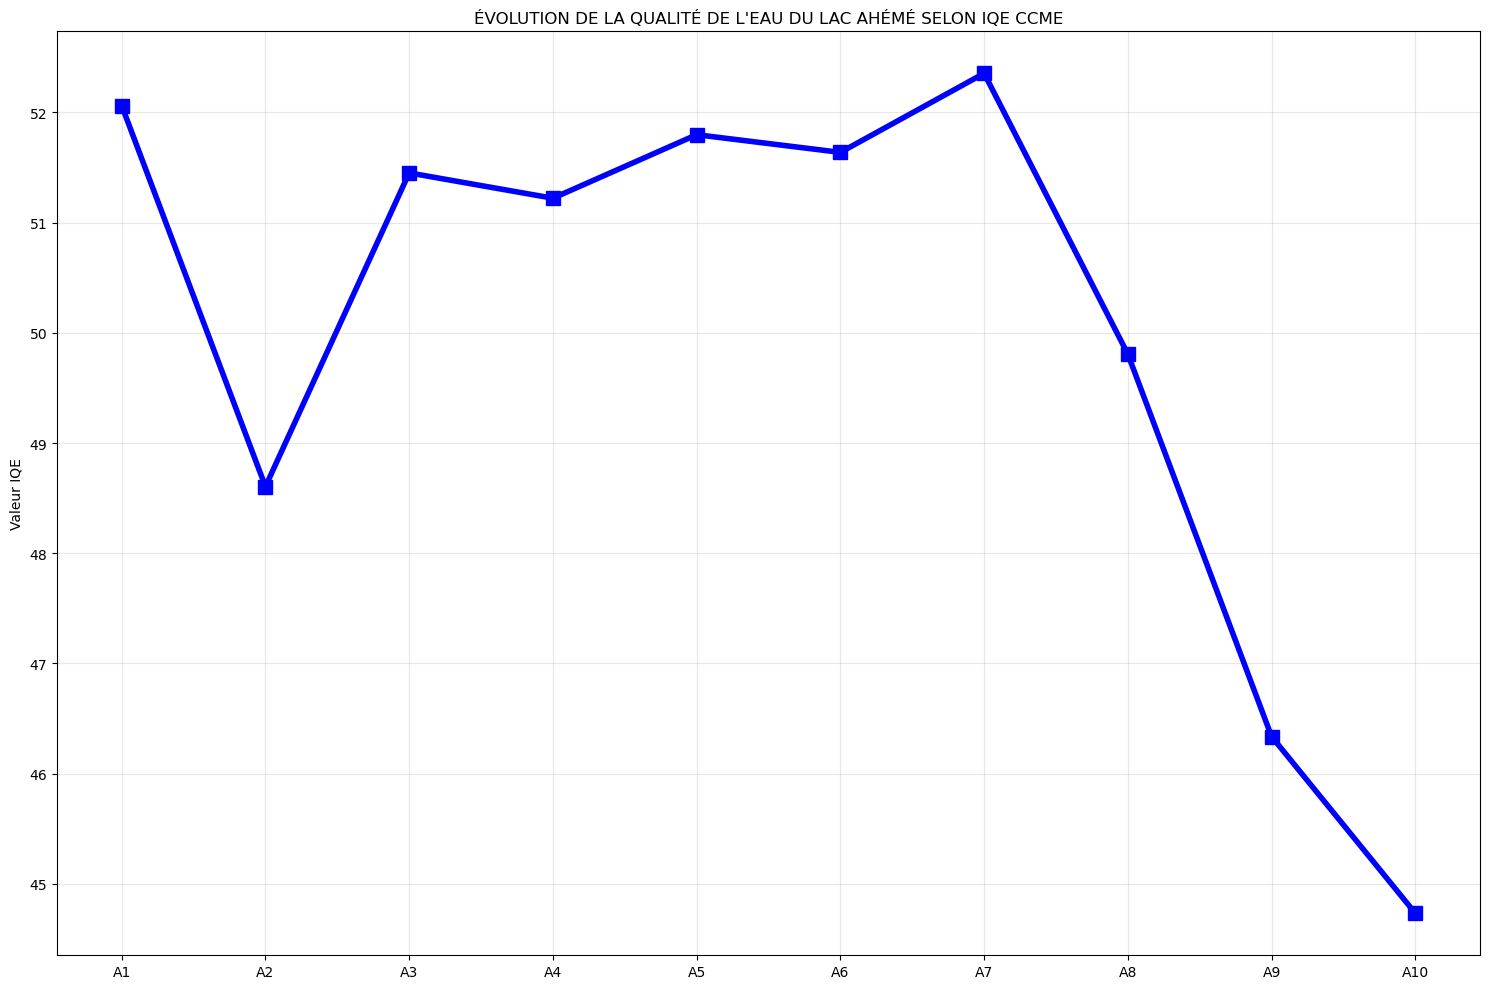

In [22]:
plt.figure(figsize=(15, 10))

# GSP
plt.plot(ccme["Stations"], ccme["IQE CCME"], marker='s', linestyle='-', linewidth=4, markersize=10, color='blue')  # Forme carrée et ligne plus épaisse
plt.title("ÉVOLUTION DE LA QUALITÉ DE L'EAU DU LAC AHÉMÉ SELON IQE CCME")
plt.ylabel('Valeur IQE')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("indice_ccme.png", dpi=300)
plt.show()


In [59]:
# Statistiques descriptives
print("Statistiques descriptives:")
print(ccme["IQE CCME"].describe())

# Corrélations
plt.figure(figsize=(8, 6))
correlation_matrix = ccme["IQE CCME"].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation entre les IQE selon les stations')
plt.tight_layout()
plt.savefig("Matrice de corrélation entre les IQE.png", dpi = 300)
plt.show()

Statistiques descriptives:
count    10.000000
mean     50.947552
std       3.698910
min      46.110169
25%      49.300973
50%      51.216761
75%      52.178256
max      59.262088
Name: IQE CCME, dtype: float64


TypeError: Series.corr() missing 1 required positional argument: 'other'

<Figure size 800x600 with 0 Axes>

In [39]:
df_copy.columns

Index(['Date', 'Mois_jr', 'Saison', 'Heure', 'Code', 'Stations', 'X', 'Y',
       'Temperature', 'Conductivity', 'Salinity', 'O2', 'Saturation', 'pH',
       'Redox', 'Transparence', 'Turbidity', 'Chl_a', 'N_NO2', 'N_NH4',
       'N_NO3', 'P_PO4', 'PT', 'NT', 'Long', 'Lat', 'Periode', 'Month_Year'],
      dtype='object')

In [40]:
# Extraction de la colonne des mois (en s'assurant qu'elle est au format string)
HE = ['05', '06', '07', '10']
mois_col = df_copy['Mois_jr'].str.split('-').str[0]

# Définition des conditions et des choix correspondants
conditions = [
    mois_col.isin(HE)
]
choix = ['HE']

# Application des conditions
df_copy['Periode'] = np.select(conditions, choix, default='BE')

In [42]:
# Supprimer les colonnes spécifiques
cols_to_drop = ['Saison', 'Code', 'Redox','N_NO3','Heure','Code', 'X', 'Y','Long', 'Lat']
df_clean = df_copy.drop(columns=[col for col in cols_to_drop if col in df_copy.columns])

In [43]:
df_clean

,Date,Mois_jr,Stations,Temperature,Conductivity,Salinity,O2,Saturation,pH,Transparence,Turbidity,Chl_a,N_NO2,N_NH4,P_PO4,PT,NT,Periode,Month_Year
0,2023-10-05,10-05,A1,29.1,2.70,1.4,6.05,78.4,8.08,NaN,67.86,NaN,8.23,150.40,167.98,250.98,22.36,HE,OCT 23
1,2023-10-05,10-05,A2,29.2,2.27,1.1,6.62,86.0,8.37,NaN,49.66,NaN,12.47,131.76,169.26,233.10,24.59,HE,OCT 23
2,2023-10-05,10-05,A3,29.4,2.76,1.4,7.01,91.4,8.43,NaN,33.14,NaN,10.21,104.36,190.97,230.55,24.96,HE,OCT 23
3,2023-10-05,10-05,A4,29.7,2.06,1.0,7.60,92.5,8.41,NaN,32.76,NaN,7.38,86.83,166.71,222.89,26.40,HE,OCT 23
4,2023-10-05,10-05,A5,29.9,0.74,0.3,6.91,90.8,8.44,NaN,31.56,NaN,10.49,71.48,153.94,192.24,20.31,HE,OCT 23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2024-10-10,10-10,A6,30.1,2.10,1.1,7.87,104.1,8.25,70.0,15.88,9.61,30.65,35.95,199.77,410.58,6.58,HE,OCT 24
126,2024-10-10,10-10,A7,30.1,0.70,0.3,6.82,90.0,7.80,45.0,40.14,3.20,63.85,39.90,158.07,409.30,6.24,HE,OCT 24
127,2024-10-10,10-10,A8,29.4,2.83,1.4,7.84,102.4,8.26,80.0,15.02,5.34,32.96,37.36,198.23,392.70,10.19,HE,OCT 24
128,2024-10-10,10-10,A9,29.7,3.20,1.7,8.00,105.1,8.46,64.0,18.96,7.48,28.33,39.34,181.24,395.25,11.10,HE,OCT 24


In [37]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='mixed', dayfirst=True)
df_copy['Heure'] = df_copy['Heure'].astype(str)
# Créer une liste des mois sous forme de chaînes de 3 lettres
df_copy['Month_Year'] = df_copy['Date'].dt.strftime('%b %y').str.upper()
#df_copy['Year_month'] = df_copy['Date'].dt.strftime('%Y-%m')

In [38]:
# Calcul des moyennes mensuelles par station et par paramètre
period_means = df_copy.groupby(['Stations', 'Periode'])[parameters].mean().reset_index()

NameError: name 'parameters' is not defined

In [34]:
def impute_missing(group):
    numeric_cols = group.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        group[col] = group[col].fillna(group[col].mean())
    return group

df_clean = df_copy.groupby(['Periode', 'Stations']).apply(impute_missing).reset_index(drop=True)

In [35]:
df_clean

,Date,Mois_jr,Saison,Heure,Code,Stations,X,Y,Temperature,Conductivity,...,N_NO2,N_NH4,N_NO3,P_PO4,PT,NT,Long,Lat,Periode,Month_Year
0,2023-11-02,11-02,GSS,09:06:00,2,A1,1.93618,6.3918,29.1,0.11,...,6.82,86.83,0.175,183.31,249.70,24.01,382769.630037,706304.353377,BE,NOV 23
1,2023-12-06,12-06,GSS,08:54:00,3,A1,1.93618,6.3918,29.1,0.90,...,10.49,132.86,0.200,111.81,317.37,17.04,382769.630037,706304.353377,BE,DEC 23
2,2024-01-18,01-18,GSS,09:18:00,4,A1,1.93618,6.3918,29.1,14.18,...,1.73,40.80,0.175,115.64,156.49,29.21,382769.630037,706304.353377,BE,JAN 24
3,2024-02-08,02-08,GSS,08:57:00,5,A1,1.93618,6.3918,26.8,26.10,...,2.58,0.24,0.175,128.40,179.48,18.97,382769.630037,706304.353377,BE,FEB 24
4,2024-03-07,03-07,GSS,10:33:00,6,A1,1.93618,6.3918,30.1,34.30,...,1.73,245.75,0.175,77.33,174.37,19.36,382769.630037,706304.353377,BE,MAR 24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2023-10-05,10-05,PSP,13:21:00,1,A9,1.93730,6.4568,29.8,1.44,...,10.78,79.16,0.140,155.22,221.61,26.25,382486.591631,713823.225992,HE,OCT 23
126,2024-05-08,05-08,GSP,13:20:00,8,A9,1.93730,6.4568,31.5,17.12,...,6.25,51.76,0.190,119.47,151.39,17.31,382486.591631,713823.225992,HE,MAY 24
127,2024-06-06,06-06,GSP,13:49:00,9,A9,1.93730,6.4568,30.4,13.26,...,2.29,63.30,0.190,61.54,137.22,32.72,382486.591631,713823.225992,HE,JUN 24
128,2024-07-09,07-09,GSS,13:30:00,10,A9,1.93730,6.4568,27.9,4.05,...,2.58,36.41,0.220,146.28,174.37,1.50,382486.591631,713823.225992,HE,JUL 24


In [4]:
## 2) Imputation des valeurs manquantes par la moyenne par groupe

In [5]:
def impute_missing(group):
    numeric_cols = group.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        group[col] = group[col].fillna(group[col].mean())
    return group

df_clean = df_copy.groupby(['Saison', 'Stations']).apply(impute_missing).reset_index(drop=True)

In [6]:
# 3) Sélection et renommage des colonnes
cols_to_keep = [col for col in df_clean.columns if not col.startswith('cleaned_')]
df_clean = df_clean[cols_to_keep]

# Supprimer les colonnes spécifiques
cols_to_drop = ['Saison', 'Code', 'Redox','N_NO3']
df_clean = df_clean.drop(columns=[col for col in cols_to_drop if col in df_clean.columns])

In [7]:
# 4) Conversion des types
df_clean['Stations'] = df_clean['Stations'].astype('category')
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

In [8]:
mv = df_clean.isna().sum()
mv

Date            0
Mois_jr         0
Heure           0
Stations        0
X               0
Y               0
Temperature     0
Conductivity    0
Salinity        0
O2              0
Saturation      0
pH              0
Transparence    0
Turbidity       0
Chl_a           0
N_NO2           0
N_NH4           0
P_PO4           0
PT              0
NT              0
Long            0
Lat             0
Year_month      0
dtype: int64

In [9]:
# 6) Création d'un dataframe numérique seulement
df_num = df_clean.select_dtypes(include=[np.number])
cols_to_exclude = ['X', 'Y', 'Long', 'Lat']
df_num = df_num.drop(columns=[col for col in cols_to_exclude if col in df_num.columns])

In [10]:
df_num['Stations'] = df_clean['Stations']

In [11]:
df_num['N_NH4'] = df_num['N_NH4'] /1000
df_num['N_NO2'] = df_num['N_NO2'] /1000
df_num['PT'] = df_num['PT'] /1000
df_num['P_PO4'] = df_num['P_PO4'] /1000
df_num['Conductivity'] = df_num['Conductivity'] *1000

In [12]:
df_num.head()

,Temperature,Conductivity,Salinity,O2,Saturation,pH,Transparence,Turbidity,Chl_a,N_NO2,N_NH4,P_PO4,PT,NT,Stations
0,30.7,48100.0,31.7,6.43,85.9,7.95,70.57,26.94,7.12,0.00173,0.05176,0.03451,0.15394,9.51,A1
1,30.6,19080.0,11.4,4.90,65.8,7.24,46.00,24.72,2.14,0.00625,0.08792,0.04541,0.16160,19.67,A1
2,30.0,14500.0,8.5,6.18,80.8,8.01,20.00,27.34,3.20,0.00173,0.05118,0.03528,0.06385,37.63,A1
3,33.0,24800.0,15.2,8.04,112.1,8.40,45.00,30.28,8.54,0.00144,0.09012,0.17274,0.39398,25.18,A10
4,32.5,18360.0,11.0,7.16,99.8,8.01,29.00,56.40,6.41,0.00540,0.09998,0.08882,0.12330,18.32,A10


In [13]:
df_num.columns

Index(['Temperature', 'Conductivity', 'Salinity', 'O2', 'Saturation', 'pH',
       'Transparence', 'Turbidity', 'Chl_a', 'N_NO2', 'N_NH4', 'P_PO4', 'PT',
       'NT', 'Stations'],
      dtype='object')

In [48]:
dfgp = round(df_num.groupby("Stations").mean(),3)
dfgp.head()

,Temperature,Conductivity,Salinity,O2,Saturation,pH,Transparence,Turbidity,Chl_a,N_NO2,N_NH4,P_PO4,PT,NT
Stations,,,,,,,,,,,,,,
A1,28.854,13829.231,8.892,6.495,83.800,7.942,42.916,48.891,4.268,0.006,0.086,0.119,0.219,17.283
A10,30.638,8596.923,5.154,7.455,99.454,8.251,40.372,52.576,6.795,0.008,0.070,0.149,0.260,21.864
A2,28.754,8705.385,5.085,7.328,94.368,8.301,65.192,44.245,5.806,0.007,0.069,0.130,0.261,17.904
A3,29.115,6029.231,3.415,7.378,95.200,8.262,76.077,30.055,3.862,0.006,0.061,0.168,0.254,18.591
A4,29.331,4544.615,2.554,7.486,97.592,8.279,65.372,28.698,4.050,0.007,0.051,0.163,0.281,17.386


In [49]:
#dfgp.describe()

In [50]:
# Seuils Norme marocaine eau de surface et lac
normes = {
    'Temperature': 30,
    'Conductivity': 2700,
    'O2': 3,
    'pH': 9,
    'Turbidity': 5,
    'Chl_a': 30,
    'N_NO2': 0.1,
    'N_NH4': 2,
    'P_PO4': 1,
    'PT': 0.5,
    'NT': 1.0
}

In [53]:
df = pd.DataFrame(normes)
print(df)

ValueError: If using all scalar values, you must pass an index

In [15]:
# Fonction qui vérifie pour une ligne si un paramètre dépasse la norme
def compare_avec_normes(row, normes):
    for parametre, valeur_norme in normes.items():
        if parametre in row and row[parametre] > valeur_norme:
            return 0  # au moins une valeur dépasse la norme
    return 1  # toutes les valeurs sont conformes

# Application de la fonction à chaque ligne du dataframe
df_num['Conformite'] = df_num.apply(compare_avec_normes, axis=1, normes=normes)

df_num.head()

,Temperature,Conductivity,Salinity,O2,Saturation,pH,Transparence,Turbidity,Chl_a,N_NO2,N_NH4,P_PO4,PT,NT,Stations,Conformite
0,30.7,48100.0,31.7,6.43,85.9,7.95,70.57,26.94,7.12,0.00173,0.05176,0.03451,0.15394,9.51,A1,0
1,30.6,19080.0,11.4,4.90,65.8,7.24,46.00,24.72,2.14,0.00625,0.08792,0.04541,0.16160,19.67,A1,0
2,30.0,14500.0,8.5,6.18,80.8,8.01,20.00,27.34,3.20,0.00173,0.05118,0.03528,0.06385,37.63,A1,0
3,33.0,24800.0,15.2,8.04,112.1,8.40,45.00,30.28,8.54,0.00144,0.09012,0.17274,0.39398,25.18,A10,0
4,32.5,18360.0,11.0,7.16,99.8,8.01,29.00,56.40,6.41,0.00540,0.09998,0.08882,0.12330,18.32,A10,0


In [16]:
df_num['Conformite'].unique()

array([0], dtype=int64)

In [44]:
# Seuils Ifremer pour un lac
normes_lac = {
    'Temperature': 30,
    'Conductivity': 2700,
    'O2': 5,
    'pH_min': 6.5,
    'pH_max': 9.0,
    'Turbidity': 5,
    'Chl_a': 30,
    'N_NO2': 0.1,
    'N_NH4': 1,
    'P_PO4': 1,
    'PT': 0.5,
    'NT': 1.0
}

def compare_lac(row, normes):
    # Test des paramètres avec seuils supérieurs
    for param in ['Temperature', 'Conductivity', 'Turbidity', 'Chl_a', 'N_NO2', 'N_NH4', 'P_PO4', 'PT', 'NT']:
        if param in row:
            val = row[param]
            seuil = normes[param]
            if param == 'Transparence':  # Transparence seuil minimum
                if val < seuil:
                    return 1
            else:  # Seuil maximum
                if val > seuil:
                    return 1
    # Cas particulier du pH entre min et max
    if 'pH' in row:
        if row['pH'] < normes['pH_min'] or row['pH'] > normes['pH_max']:
            return 1
    # Cas oxygène seuil minimum
    if 'O2' in row and row['O2'] < normes['O2']:
        return 1

    return 0

# Application au dataframe
dfgp['Conformite'] = dfgp.apply(compare_lac, axis=1, normes=normes_lac)

dfgp.head()

,Temperature,Conductivity,Salinity,O2,Saturation,pH,Transparence,Turbidity,Chl_a,N_NO2,N_NH4,P_PO4,PT,NT,Conformite
Stations,,,,,,,,,,,,,,,
A1,28.854,13829.231,8.892,6.495,83.800,7.942,42.916,48.891,4.268,0.006,0.086,0.119,0.219,17.283,0
A10,30.638,8596.923,5.154,7.455,99.454,8.251,40.372,52.576,6.795,0.008,0.070,0.149,0.260,21.864,0
A2,28.754,8705.385,5.085,7.328,94.368,8.301,65.192,44.245,5.806,0.007,0.069,0.130,0.261,17.904,0
A3,29.115,6029.231,3.415,7.378,95.200,8.262,76.077,30.055,3.862,0.006,0.061,0.168,0.254,18.591,0
A4,29.331,4544.615,2.554,7.486,97.592,8.279,65.372,28.698,4.050,0.007,0.051,0.163,0.281,17.386,0


In [45]:
dfgp['Conformite'].unique()

array([0], dtype=int64)

In [ ]:
import numpy as np
import pandas as pd
from typing import Optional, Union, List, Tuple
import warnings

def get_excursions(value: np.ndarray, lower: Optional[np.ndarray] = None, 
                   upper: Optional[np.ndarray] = None) -> np.ndarray:
    """
    Calcule les excursions par rapport aux limites supérieures et inférieures.
    
    Args:
        value: Valeurs numériques
        lower: Limites inférieures (optionnel)
        upper: Limites supérieures (optionnel)
    
    Returns:
        Array numpy des excursions
    """
    # Convertir en arrays numpy et gérer les valeurs manquantes
    value = np.array(value, dtype=float)
    
    if lower is None:
        lower = np.full_like(value, np.nan)
    else:
        lower = np.array(lower, dtype=float)
    
    if upper is None:
        upper = np.full_like(value, np.nan)
    else:
        upper = np.array(upper, dtype=float)
    
    # Vérifier que lower et upper sont numériques
    if not (np.issubdtype(lower.dtype, np.number) and np.issubdtype(upper.dtype, np.number)):
        raise ValueError("lower et upper doivent être numériques")
    
    # Identifier les valeurs en dehors des limites
    less = ~np.isnan(lower) & (value <= lower)
    more = ~np.isnan(upper) & (value >= upper)
    
    # Vérifier la cohérence des limites
    if np.any(less & more):
        raise ValueError("la limite inférieure doit être inférieure à la limite supérieure")
    
    # Calculer les excursions
    excursion = np.zeros_like(value)
    excursion[more] = value[more] / upper[more] - 1
    excursion[less] = lower[less] / value[less] - 1
    
    return excursion


def categorize_wqi(x: np.ndarray) -> pd.Categorical:
    """
    Catégorise les indices de qualité de l'eau entre 1 et 100 selon le manuel CCME.
    
    Args:
        x: Vecteur numérique des valeurs WQI à catégoriser
    
    Returns:
        Catégories pandas
    """
    x = np.array(x, dtype=float)
    
    labels = ["Poor", "Marginal", "Fair", "Good", "Excellent"]
    bins = [-1, 44, 64, 79, 94, 100]
    
    # Créer les catégories
    categories = pd.cut(x, bins=bins, labels=labels, ordered=True)
    # Inverser l'ordre des niveaux comme dans le code R
    categories = pd.Categorical(categories, categories=reversed(labels), ordered=True)
    
    return categories


def wqif(nv: int, nt: int, nfv: int, nft: int, nse: float) -> dict:
    """
    Calcule les composantes F1, F2, F3 et le WQI.
    
    Args:
        nv: Nombre de variables
        nt: Nombre total de tests
        nfv: Nombre de variables défaillantes
        nft: Nombre de tests défaillants
        nse: Somme normalisée des excursions
    
    Returns:
        Dictionnaire avec WQI, F1, F2, F3
    """
    F1 = nfv / nv * 100
    F2 = nft / nt * 100
    F3 = nse / (nse + 1) * 100
    
    WQI = 100 - np.sqrt(F1**2 + F2**2 + F3**2) / 1.732
    
    return {"WQI": WQI, "F1": F1, "F2": F2, "F3": F3}


def wqif_excursion_variable(x: np.ndarray, v: np.ndarray, nv: int, nt: int) -> dict:
    """
    Calcule le WQI à partir des excursions et variables.
    
    Args:
        x: Array des excursions
        v: Array des variables
        nv: Nombre de variables
        nt: Nombre total de tests
    
    Returns:
        Dictionnaire avec WQI, F1, F2, F3
    """
    nft = np.sum(x != 0)
    nfv = len(np.unique(v[x != 0]))
    nse = np.sum(x) / nt
    
    return wqif(nv=nv, nt=nt, nfv=nfv, nft=nft, nse=nse)


def wqif_matrix(x: np.ndarray) -> dict:
    """
    Calcule le WQI à partir d'une matrice d'excursions.
    
    Args:
        x: Matrice 2D des excursions
    
    Returns:
        Dictionnaire avec WQI, F1, F2, F3
    """
    not_missing = ~np.isnan(x)
    nt = np.sum(not_missing)
    not_all_missing = ~np.all(np.isnan(x), axis=0)
    nv = np.sum(not_all_missing)
    nft = np.sum(not_missing & (x != 0))
    
    # Compter les variables avec au moins une excursion non nulle
    nfv = 0
    for col_idx in range(x.shape[1]):
        if not_all_missing[col_idx]:
            col_data = x[:, col_idx]
            if np.any(~np.isnan(col_data) & (col_data != 0)):
                nfv += 1
    
    nse = np.sum(x[not_missing]) / nt
    
    return wqif(nv=nv, nt=nt, nfv=nfv, nft=nft, nse=nse)


def wqi_matrix(x: np.ndarray, i: Optional[np.ndarray] = None) -> float:
    """
    Calcule uniquement le WQI à partir d'une matrice.
    
    Args:
        x: Matrice 2D des excursions
        i: Indices des lignes à utiliser
    
    Returns:
        Valeur WQI
    """
    if i is None:
        i = np.arange(x.shape[0])
    
    return wqif_matrix(x[i, :])["WQI"]


def four(x: pd.DataFrame) -> pd.DataFrame:
    """
    Vérifie si un groupe a au moins 4 observations.
    
    Args:
        x: DataFrame avec les données
    
    Returns:
        DataFrame avec une colonne booléenne 'Four'
    """
    return pd.DataFrame({"Four": [len(x) >= 4]})


def fourtimesfour(x: pd.DataFrame) -> bool:
    """
    Vérifie s'il y a au moins 4 variables avec au moins 4 observations chacune.
    
    Args:
        x: DataFrame avec les données
    
    Returns:
        Booléen indiquant si la condition est satisfaite
    """
    # Grouper par variable et appliquer la fonction four
    grouped = x.groupby("Variable").apply(four).reset_index()
    # Compter les variables avec au moins 4 observations
    variables_with_four = np.sum(grouped["Four"])
    
    return variables_with_four >= 4


def set_detection_limits(x: pd.DataFrame, messages: bool = True) -> pd.DataFrame:
    """
    Remplace les valeurs zéro par leur limite de détection si disponible.
    
    Args:
        x: DataFrame avec les données
        messages: Afficher les messages
    
    Returns:
        DataFrame modifié
    """
    x_copy = x.copy()
    
    if "DetectionLimit" not in x_copy.columns:
        x_copy["DetectionLimit"] = 0
    
    # Identifier les lignes où Value = 0 et DetectionLimit > 0
    mask = (x_copy["Value"] == 0) & ~np.isnan(x_copy["DetectionLimit"]) & (x_copy["DetectionLimit"] > 0)
    
    if np.any(mask):
        x_copy.loc[mask, "Value"] = x_copy.loc[mask, "DetectionLimit"]
        if messages:
            count = np.sum(mask)
            plural = "s" if count > 1 else ""
            message = f"Replaced {count} of the value{plural} in column Value with the detection limit in column DetectionLimit."
            warnings.warn(message)
    
    return x_copy


def calc_wqi_by(x: pd.DataFrame, messages: bool = True) -> pd.DataFrame:
    """
    Calcule le WQI pour un sous-ensemble de données.
    
    Args:
        x: DataFrame avec les données
        messages: Afficher les messages
    
    Returns:
        DataFrame avec les résultats WQI
    """
    # Cette fonction nécessiterait l'implémentation complète de boot_wqis
    # Pour l'instant, retournons un DataFrame vide comme placeholder
    return pd.DataFrame()


def calc_wqi(x: pd.DataFrame, by: Optional[List[str]] = None, 
             messages: bool = True) -> pd.DataFrame:
    """
    Calcule l'indice de qualité de l'eau (WQI) selon la méthode CCME.
    
    Args:
        x: DataFrame avec les données
        by: Colonnes pour grouper les calculs
        messages: Afficher les messages
    
    Returns:
        DataFrame avec les résultats WQI
    """
    # Vérifications de base
    if not isinstance(x, pd.DataFrame):
        raise ValueError("x doit être un DataFrame")
    
    if by is not None and (not isinstance(by, list) or not all(isinstance(col, str) for col in by)):
        raise ValueError("by doit être une liste de chaînes de caractères")
    
    # Vérifier les colonnes requises
    required_cols = ["Variable", "Value", "UpperLimit"]
    missing_cols = [col for col in required_cols if col not in x.columns]
    if missing_cols:
        raise ValueError(f"x doit contenir les colonnes: {missing_cols}")
    
    if messages:
        print("Calculating water quality indices...")
    
    # Ajouter les colonnes manquantes avec des valeurs par défaut
    if "Date" not in x.columns:
        x = x.copy()
        x["Date"] = pd.to_datetime("2000-01-01")
    
    if "LowerLimit" not in x.columns:
        x = x.copy()
        x["LowerLimit"] = np.nan
    
    if "DetectionLimit" not in x.columns:
        x = x.copy()
        x["DetectionLimit"] = 0
    
    # Vérifier les types de colonnes
    if not pd.api.types.is_numeric_dtype(x["Value"]):
        raise ValueError("La colonne Value doit être numérique")
    
    # Nettoyer les données
    x_clean = x.dropna(subset=["Date", "Variable", "Value"])
    
    # Appliquer les limites de détection
    x_clean = set_detection_limits(x_clean, messages=messages)
    
    # Calculer le WQI
    if by is None:
        result = calc_wqi_by(x_clean, messages=messages)
    else:
        # Grouper par les colonnes spécifiées
        result = x_clean.groupby(by).apply(calc_wqi_by, messages=messages).reset_index()
    
    if messages:
        print("Calculated water quality indices.")
    
    return result

Génération de la carte mentale IQE...


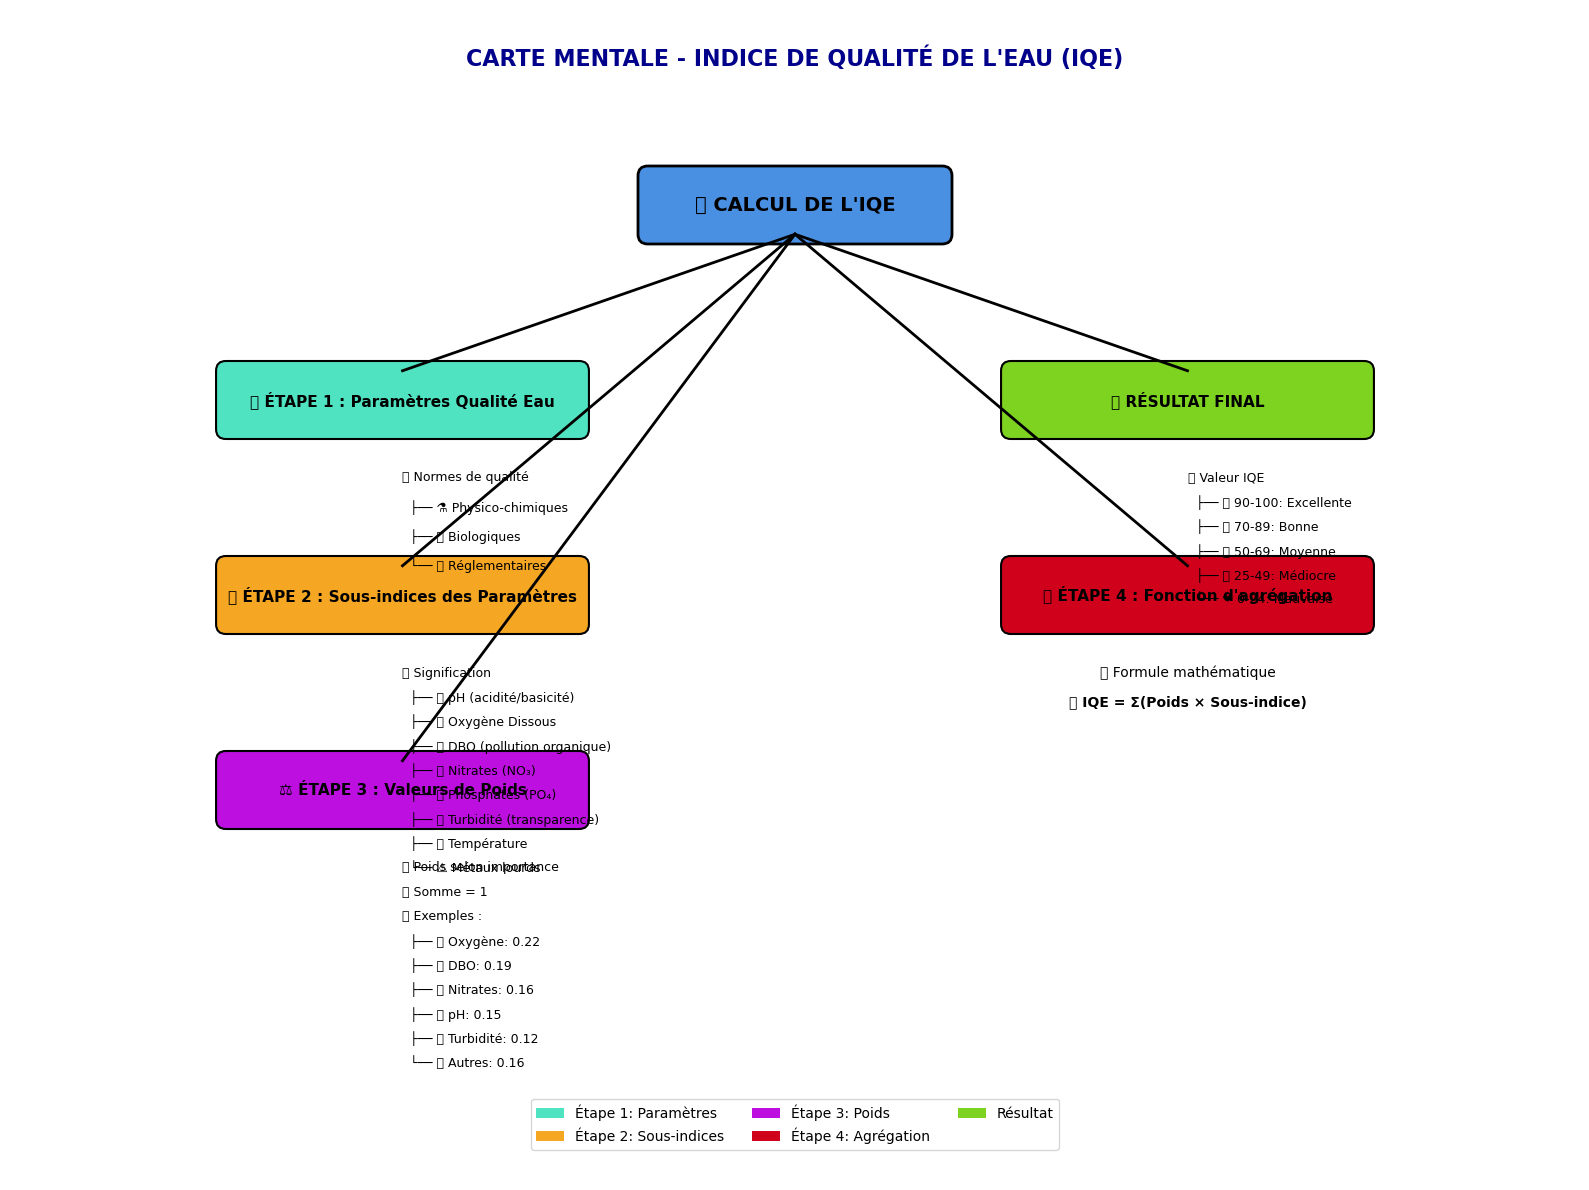

Carte mentale sauvegardée sous : carte_mentale_iqe.png



Voulez-vous voir la version alternative avec NetworkX? (o/n):  o


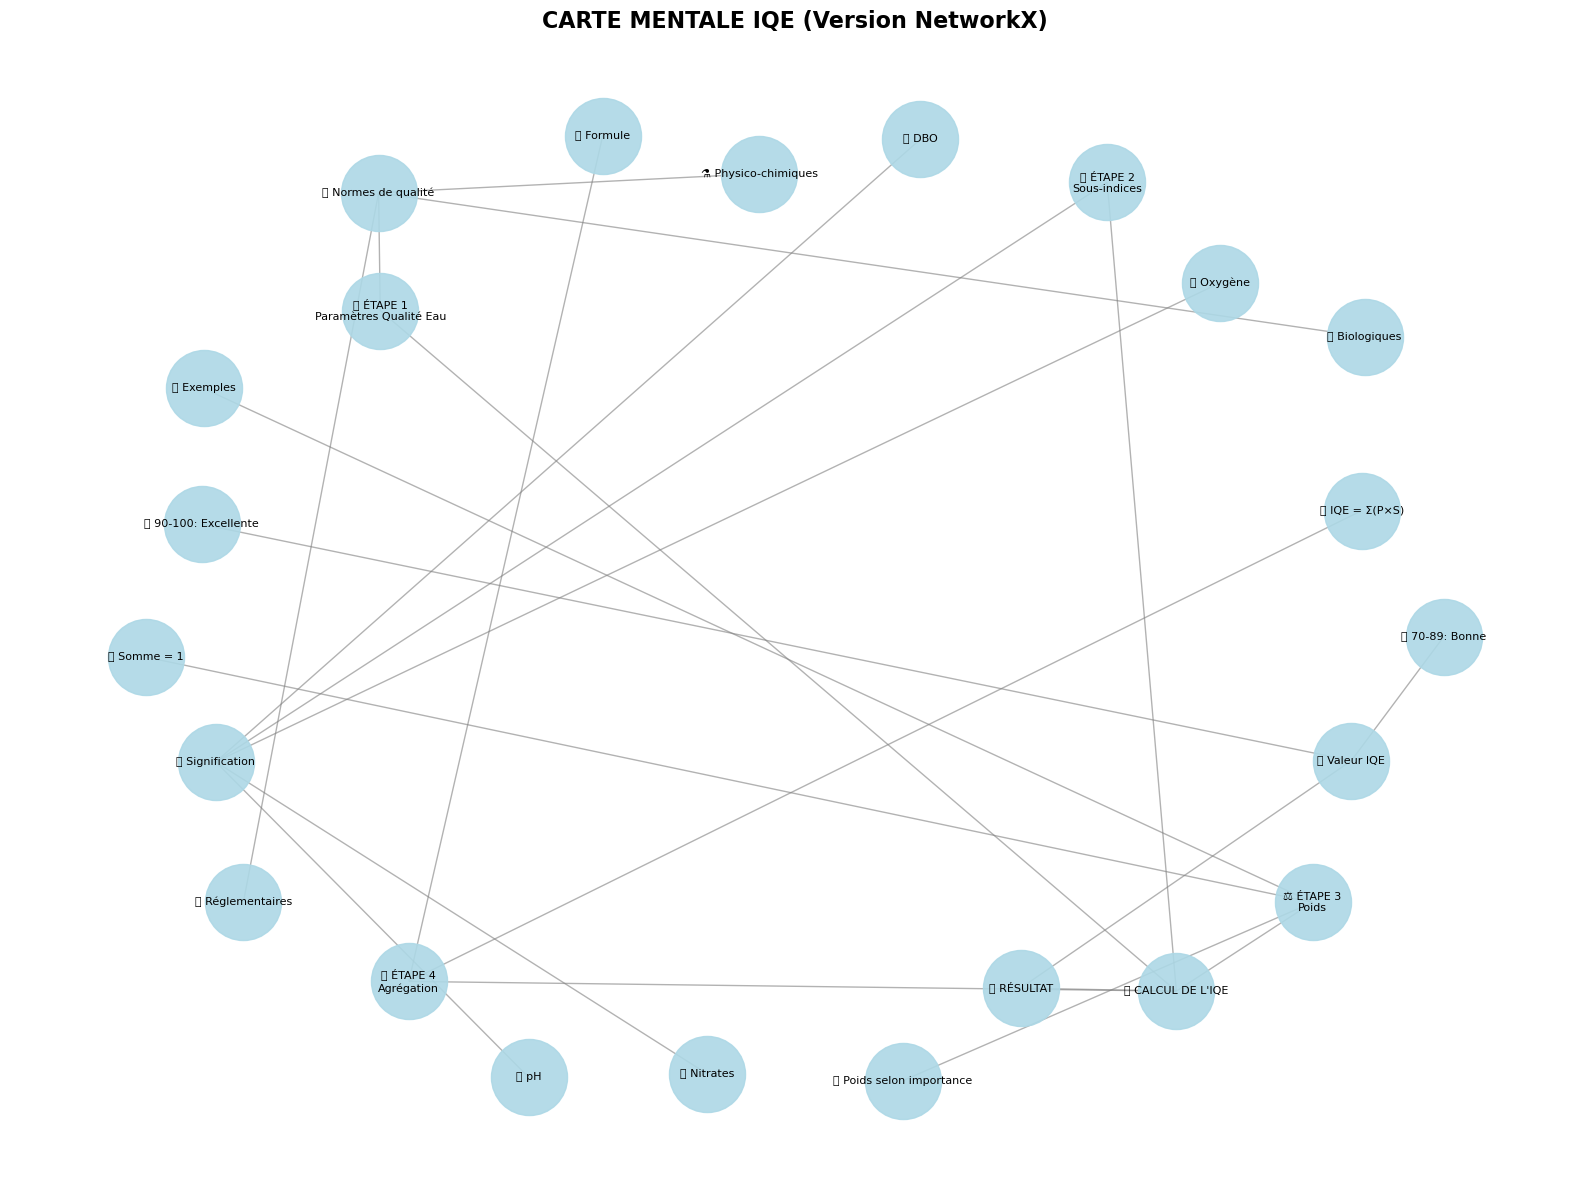


Carte mentale générée avec succès!


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np

def create_iqe_mind_map():
    # Configuration de la figure
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    # Couleurs pour chaque étape
    colors = {
        'centre': '#4A90E2',
        'etape1': '#50E3C2',
        'etape2': '#F5A623',
        'etape3': '#BD10E0',
        'etape4': '#D0021B',
        'resultat': '#7ED321'
    }
    
    # Position centrale
    centre_x, centre_y = 8, 10
    
    # Dessiner le centre
    centre = FancyBboxPatch((centre_x-1.5, centre_y-0.3), 3, 0.6,
                           boxstyle="round,pad=0.1",
                           facecolor=colors['centre'],
                           edgecolor='black',
                           linewidth=2)
    ax.add_patch(centre)
    ax.text(centre_x, centre_y, '🎯 CALCUL DE L\'IQE', 
            ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Positions des étapes principales
    etapes = [
        (4, 8, '🔧 ÉTAPE 1 : Paramètres Qualité Eau', colors['etape1']),
        (4, 6, '🔍 ÉTAPE 2 : Sous-indices des Paramètres', colors['etape2']),
        (4, 4, '⚖️ ÉTAPE 3 : Valeurs de Poids', colors['etape3']),
        (12, 6, '🧮 ÉTAPE 4 : Fonction d\'agrégation', colors['etape4']),
        (12, 8, '📈 RÉSULTAT FINAL', colors['resultat'])
    ]
    
    # Dessiner les étapes principales
    for x, y, text, color in etapes:
        # Ligne de connexion au centre
        ax.plot([centre_x, x], [centre_y-0.3, y+0.3], 'k-', lw=2)
        
        # Rectangle de l'étape
        rect = FancyBboxPatch((x-1.8, y-0.3), 3.6, 0.6,
                             boxstyle="round,pad=0.1",
                             facecolor=color,
                             edgecolor='black',
                             linewidth=1.5)
        ax.add_patch(rect)
        ax.text(x, y, text, ha='center', va='center', 
                fontsize=11, fontweight='bold')
    
    # Contenu détaillé pour chaque étape
    
    # Étape 1
    etape1_content = [
        "📋 Normes de qualité",
        "  ├── ⚗️ Physico-chimiques",
        "  ├── 🦠 Biologiques", 
        "  └── 📜 Réglementaires"
    ]
    for i, line in enumerate(etape1_content):
        ax.text(4, 7.2 - i*0.3, line, ha='left', va='center', fontsize=9)
    
    # Étape 2
    etape2_content = [
        "📊 Signification",
        "  ├── 🧪 pH (acidité/basicité)",
        "  ├── 💨 Oxygène Dissous",
        "  ├── 🔥 DBO (pollution organique)",
        "  ├── 🌿 Nitrates (NO₃)",
        "  ├── 🌊 Phosphates (PO₄)",
        "  ├── 👁️ Turbidité (transparence)",
        "  ├── 🌡️ Température",
        "  └── ⚠️ Métaux lourds"
    ]
    for i, line in enumerate(etape2_content):
        ax.text(4, 5.2 - i*0.25, line, ha='left', va='center', fontsize=9)
    
    # Étape 3
    etape3_content = [
        "🎚️ Poids selon importance",
        "🧮 Somme = 1",
        "📝 Exemples :",
        "  ├── 💨 Oxygène: 0.22",
        "  ├── 🔥 DBO: 0.19", 
        "  ├── 🌿 Nitrates: 0.16",
        "  ├── 🧪 pH: 0.15",
        "  ├── 👁️ Turbidité: 0.12",
        "  └── 🔄 Autres: 0.16"
    ]
    for i, line in enumerate(etape3_content):
        ax.text(4, 3.2 - i*0.25, line, ha='left', va='center', fontsize=9)
    
    # Étape 4
    etape4_content = [
        "📐 Formule mathématique",
        "🧠 IQE = Σ(Poids × Sous-indice)"
    ]
    for i, line in enumerate(etape4_content):
        ax.text(12, 5.2 - i*0.3, line, ha='center', va='center', fontsize=10,
               fontweight='bold' if 'IQE' in line else 'normal')
    
    # Résultat final
    resultat_content = [
        "🎯 Valeur IQE",
        "  ├── 💚 90-100: Excellente",
        "  ├── 💙 70-89: Bonne", 
        "  ├── 💛 50-69: Moyenne",
        "  ├── 🧡 25-49: Médiocre",
        "  └── ❤️ 0-24: Mauvaise"
    ]
    for i, line in enumerate(resultat_content):
        ax.text(12, 7.2 - i*0.25, line, ha='left', va='center', fontsize=9)
    
    # Titre
    ax.text(8, 11.5, 'CARTE MENTALE - INDICE DE QUALITÉ DE L\'EAU (IQE)', 
            ha='center', va='center', fontsize=16, fontweight='bold',
            color='darkblue')
    
    # Légende des couleurs
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, fc=colors['etape1'], label='Étape 1: Paramètres'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['etape2'], label='Étape 2: Sous-indices'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['etape3'], label='Étape 3: Poids'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['etape4'], label='Étape 4: Agrégation'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['resultat'], label='Résultat')
    ]
    ax.legend(handles=legend_elements, loc='lower center', 
              bbox_to_anchor=(0.5, 0.02), ncol=3, fontsize=10)
    
    plt.tight_layout()
    return fig, ax

def save_mind_map(filename='carte_mentale_iqe.png', dpi=300):
    """Sauvegarder la carte mentale"""
    fig, ax = create_iqe_mind_map()
    plt.savefig(filename, dpi=dpi, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    plt.close()
    print(f"Carte mentale sauvegardée sous : {filename}")

def display_mind_map():
    """Afficher la carte mentale"""
    fig, ax = create_iqe_mind_map()
    plt.show()

# Version alternative avec networkx (plus organique)
def create_networkx_mind_map():
    try:
        import networkx as nx
        
        G = nx.Graph()
        
        # Ajouter les nœuds
        nodes = {
            'centre': '🎯 CALCUL DE L\'IQE',
            'etape1': '🔧 ÉTAPE 1\nParamètres Qualité Eau',
            'normes': '📋 Normes de qualité',
            'physico': '⚗️ Physico-chimiques',
            'bio': '🦠 Biologiques',
            'reglement': '📜 Réglementaires',
            
            'etape2': '🔍 ÉTAPE 2\nSous-indices',
            'signification': '📊 Signification',
            'ph': '🧪 pH',
            'oxygene': '💨 Oxygène',
            'dbo': '🔥 DBO',
            'nitrates': '🌿 Nitrates',
            
            'etape3': '⚖️ ÉTAPE 3\nPoids',
            'poids_importance': '🎚️ Poids selon importance',
            'somme': '🧮 Somme = 1',
            'exemples': '📝 Exemples',
            
            'etape4': '🧮 ÉTAPE 4\nAgrégation',
            'formule': '📐 Formule',
            'calcul': '🧠 IQE = Σ(P×S)',
            
            'resultat': '📈 RÉSULTAT',
            'valeur_iqe': '🎯 Valeur IQE',
            'excellente': '💚 90-100: Excellente',
            'bonne': '💙 70-89: Bonne'
        }
        
        for node, label in nodes.items():
            G.add_node(node, label=label)
        
        # Ajouter les arêtes
        edges = [
            ('centre', 'etape1'), ('centre', 'etape2'), ('centre', 'etape3'),
            ('centre', 'etape4'), ('centre', 'resultat'),
            ('etape1', 'normes'), ('normes', 'physico'), ('normes', 'bio'), ('normes', 'reglement'),
            ('etape2', 'signification'), ('signification', 'ph'), ('signification', 'oxygene'),
            ('signification', 'dbo'), ('signification', 'nitrates'),
            ('etape3', 'poids_importance'), ('etape3', 'somme'), ('etape3', 'exemples'),
            ('etape4', 'formule'), ('etape4', 'calcul'),
            ('resultat', 'valeur_iqe'), ('valeur_iqe', 'excellente'), ('valeur_iqe', 'bonne')
        ]
        
        G.add_edges_from(edges)
        
        # Dessiner le graphe
        plt.figure(figsize=(16, 12))
        pos = nx.spring_layout(G, k=3, iterations=50)
        
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                              node_size=3000, alpha=0.9)
        nx.draw_networkx_edges(G, pos, alpha=0.6, edge_color='gray')
        nx.draw_networkx_labels(G, pos, {k: v for k, v in nodes.items()}, 
                               font_size=8)
        
        plt.title("CARTE MENTALE IQE (Version NetworkX)", fontsize=16, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
    except ImportError:
        print("NetworkX n'est pas installé. Installation : pip install networkx")

# Exécution principale
if __name__ == "__main__":
    print("Génération de la carte mentale IQE...")
    
    # Version matplotlib (recommandée)
    display_mind_map()
    
    # Sauvegarder l'image
    save_mind_map()
    
    # Demander si l'utilisateur veut voir la version networkx
    response = input("\nVoulez-vous voir la version alternative avec NetworkX? (o/n): ")
    if response.lower() in ['o', 'oui', 'y', 'yes']:
        create_networkx_mind_map()
    
    print("\nCarte mentale générée avec succès!")

Génération des graphiques WQIs...

Choisissez le type de graphique:
1. Timeline détaillée
2. Version compacte
3. Liste organisée



Votre choix (1-3):  2


Graphique sauvegardé sous : wqi_compact.png

Graphiques générés avec succès!


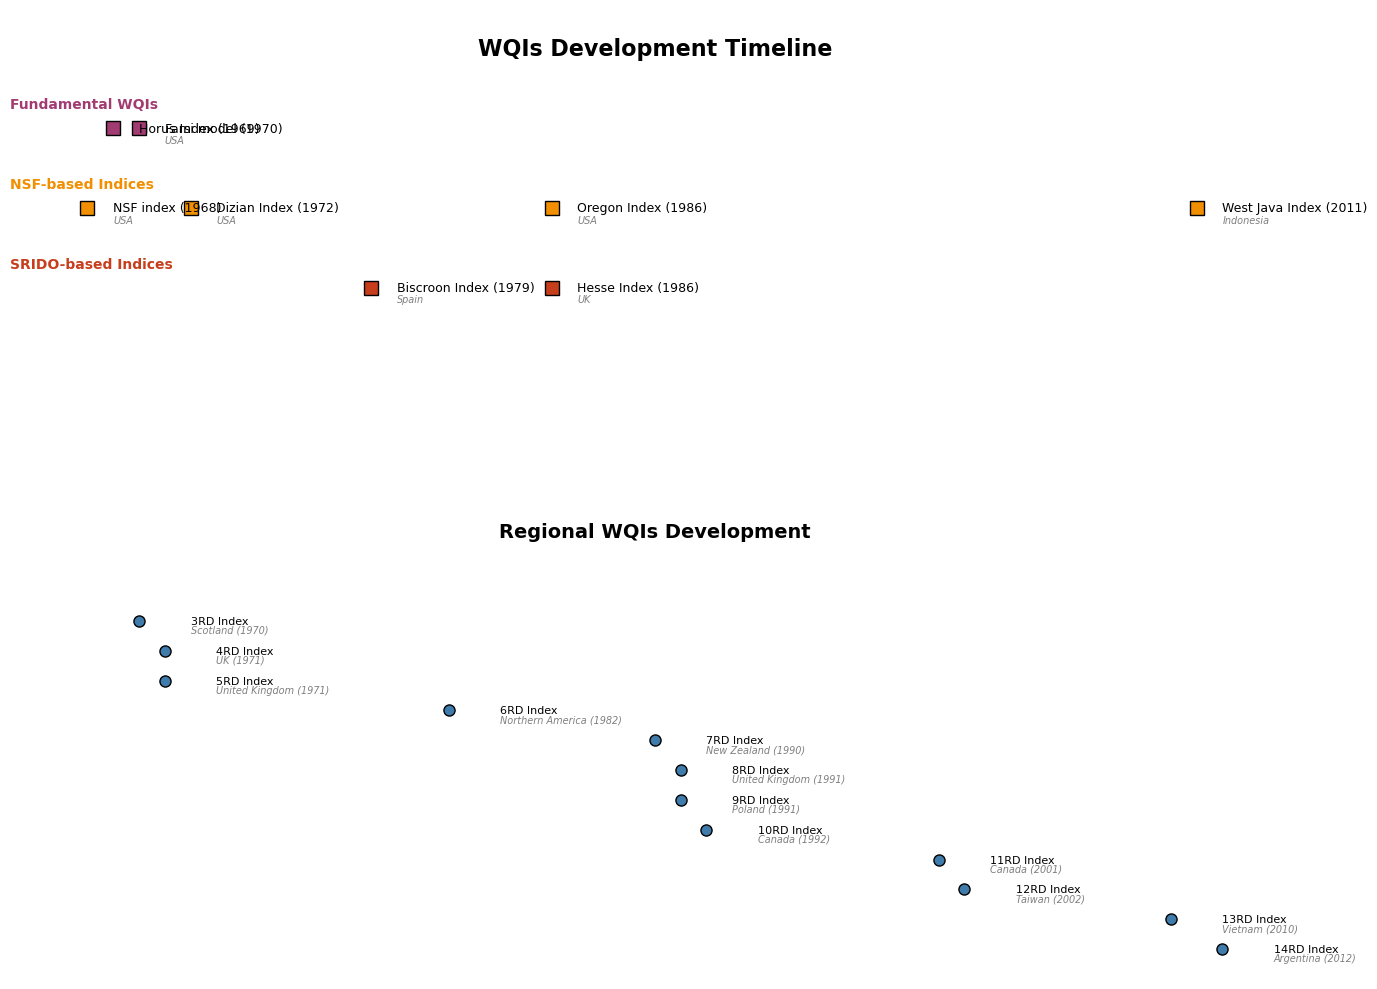

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np

def create_wqi_timeline():
    # Configuration de la figure
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    ax.set_xlim(1965, 2015)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Titre principal
    ax.text(1990, 9.5, 'WQIs - Water Quality Indices Timeline', 
            ha='center', va='center', fontsize=18, fontweight='bold',
            color='darkblue')
    
    # Ligne de temps principale
    ax.plot([1967, 2013], [8, 8], 'k-', lw=3, color='#2E86AB')
    
    # Couleurs pour différents types d'indices
    colors = {
        'fundamental': '#A23B72',
        'modified_nsf': '#F18F01',
        'modified_srido': '#C73E1D',
        'other': '#3F7CAC'
    }
    
    # Données des WQIs organisées par catégorie
    wqis_data = {
        'Fundamental WQIs': {
            'color': colors['fundamental'],
            'position': 7.5,
            'items': [
                (1969, "Horus Index", "1969"),
                (1970, "Farsi model", "USA")
            ]
        },
        '1st modified version (NSF)': {
            'color': colors['modified_nsf'],
            'position': 6.5,
            'items': [
                (1968, "NSF index", "USA")
            ]
        },
        'NSF Modified Versions': {
            'color': colors['modified_nsf'],
            'position': 5.5,
            'items': [
                (1972, "Dizian Index", "Modified version of NSF, USA"),
                (1986, "Oregon Index", "Modified Version of NSF, USA"),
                (2011, "West Java Index", "Modified version of NSF, Indonesia")
            ]
        },
        'SRIDO Modified Versions': {
            'color': colors['modified_srido'],
            'position': 4.5,
            'items': [
                (1979, "Biscroon Index", "Modified version of SRIDO, Spain"),
                (1986, "Hesse Index", "Modified version of SRIDO, UK")
            ]
        },
        'Other Regional Indices': {
            'color': colors['other'],
            'position': 3.5,
            'items': [
                (1970, "3RD Index", "Scotland"),
                (1971, "4RD Index", "UK"),
                (1971, "5RD Index", "United Kingdom"),
                (1982, "6RD Index", "Northern America"),
                (1990, "7RD Index", "New Zealand"),
                (1991, "8RD Index", "United Kingdom"),
                (1991, "9RD Index", "The Vidarich river basin, Poland"),
                (1992, "10RD Index", "Canada"),
                (2001, "11RD Index", "Modified version of IICWU, Canada"),
                (2002, "12RD Index", "Taiwan"),
                (2010, "13RD Index", "Modified version of Sati Index, Vietnam"),
                (2012, "14RD Index", "Argentina")
            ]
        }
    }
    
    # Dessiner les marqueurs et les étiquettes
    for category, data in wqis_data.items():
        color = data['color']
        y_pos = data['position']
        
        # Titre de la catégorie
        ax.text(1965, y_pos + 0.3, category, 
                ha='left', va='center', fontsize=11, fontweight='bold',
                style='italic', color=color)
        
        for year, name, location in data['items']:
            # Marqueur sur la ligne de temps
            ax.plot(year, 8, 'o', markersize=8, color=color, markeredgecolor='black')
            
            # Ligne de connexion
            ax.plot([year, year], [8, y_pos - 0.2], '--', color='gray', alpha=0.7, lw=1)
            
            # Boîte d'information
            box = FancyBboxPatch((year - 3, y_pos - 0.8), 6, 0.6,
                                boxstyle="round,pad=0.1",
                                facecolor=color, alpha=0.8,
                                edgecolor='black', linewidth=1)
            ax.add_patch(box)
            
            # Texte dans la boîte
            ax.text(year, y_pos - 0.5, f"{name} ({year})", 
                    ha='center', va='center', fontsize=9, fontweight='bold',
                    color='white')
            
            # Localisation
            ax.text(year, y_pos - 1.0, location, 
                    ha='center', va='center', fontsize=8, style='italic')

    # Légende
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, fc=colors['fundamental'], label='Fundamental WQIs'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['modified_nsf'], label='NSF Modified Versions'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['modified_srido'], label='SRIDO Modified Versions'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['other'], label='Other Regional Indices')
    ]
    ax.legend(handles=legend_elements, loc='lower center', 
              bbox_to_anchor=(0.5, 0.02), ncol=2, fontsize=10)
    
    # Échelle des années
    years = range(1970, 2015, 5)
    for year in years:
        ax.plot(year, 7.8, '|', color='black', markersize=10)
        ax.text(year, 7.6, str(year), ha='center', va='center', fontsize=8)
    
    plt.tight_layout()
    return fig, ax

def create_compact_wqi_chart():
    """Version compacte et plus organisée"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Premier sous-graphique pour les WQIs fondamentaux et modifiés
    ax1.set_xlim(1965, 2015)
    ax1.set_ylim(0, 6)
    ax1.axis('off')
    
    # Titre
    ax1.text(1990, 5.5, 'WQIs Development Timeline', 
             ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Catégories principales
    categories = [
        ("Fundamental WQIs", 4.5, '#A23B72', [
            (1969, "Horus Index", ""),
            (1970, "Farsi model", "USA")
        ]),
        ("NSF-based Indices", 3.5, '#F18F01', [
            (1968, "NSF index", "USA"),
            (1972, "Dizian Index", "USA"),
            (1986, "Oregon Index", "USA"),
            (2011, "West Java Index", "Indonesia")
        ]),
        ("SRIDO-based Indices", 2.5, '#C73E1D', [
            (1979, "Biscroon Index", "Spain"),
            (1986, "Hesse Index", "UK")
        ])
    ]
    
    for category, y_pos, color, items in categories:
        ax1.text(1965, y_pos + 0.3, category, 
                ha='left', va='center', fontweight='bold', color=color)
        
        for year, name, location in items:
            ax1.plot(year, y_pos, 's', markersize=10, color=color, markeredgecolor='black')
            ax1.text(year + 1, y_pos, f"{name} ({year})", 
                    ha='left', va='center', fontsize=9)
            if location:
                ax1.text(year + 1, y_pos - 0.15, location, 
                        ha='left', va='center', fontsize=7, style='italic', color='gray')
    
    # Deuxième sous-graphique pour les indices régionaux
    ax2.set_xlim(1965, 2015)
    ax2.set_ylim(0, 8)
    ax2.axis('off')
    
    ax2.text(1990, 7.5, 'Regional WQIs Development', 
             ha='center', va='center', fontsize=14, fontweight='bold')
    
    regional_indices = [
        (1970, "3RD Index", "Scotland", 6),
        (1971, "4RD Index", "UK", 5.5),
        (1971, "5RD Index", "United Kingdom", 5),
        (1982, "6RD Index", "Northern America", 4.5),
        (1990, "7RD Index", "New Zealand", 4),
        (1991, "8RD Index", "United Kingdom", 3.5),
        (1991, "9RD Index", "Poland", 3),
        (1992, "10RD Index", "Canada", 2.5),
        (2001, "11RD Index", "Canada", 2),
        (2002, "12RD Index", "Taiwan", 1.5),
        (2010, "13RD Index", "Vietnam", 1),
        (2012, "14RD Index", "Argentina", 0.5)
    ]
    
    for year, name, location, y_pos in regional_indices:
        ax2.plot(year, y_pos, 'o', markersize=8, color='#3F7CAC', markeredgecolor='black')
        ax2.text(year + 2, y_pos, f"{name}", 
                ha='left', va='center', fontsize=8)
        ax2.text(year + 2, y_pos - 0.15, f"{location} ({year})", 
                ha='left', va='center', fontsize=7, style='italic', color='gray')
    
    plt.tight_layout()
    return fig, (ax1, ax2)

def create_simple_wqi_list():
    """Version simple en liste organisée"""
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    ax.axis('off')
    
    # Titre
    ax.text(0.5, 0.95, 'Water Quality Indices (WQIs) Development', 
            ha='center', va='center', fontsize=16, fontweight='bold',
            transform=ax.transAxes)
    
    # Contenu organisé
    content = [
        "FUNDAMENTAL WQIs",
        "• Horus Index (1969)",
        "• Farsi (1970) model, USA",
        "",
        "1ST MODIFIED VERSION",
        "• NSF index (1968), USA",
        "",
        "2ND MODIFIED VERSION",
        "• Dizian Index (1972) - Modified version of NSF, USA",
        "",
        "REGIONAL INDICES:",
        "• 3RD Index (1970) - Scotland",
        "• 4RD Index (1971) - UK", 
        "• 5RD Index (1971) - United Kingdom",
        "• 6RD Index (1982) - Northern America",
        "• 7RD Index (1990) - New Zealand",
        "• 8RD Index (1991) - United Kingdom",
        "• 9RD Index (1991) - The Vidarich river basin, Poland",
        "• 10RD Index (1992) - Canada",
        "• 11RD Index (2001) - Modified version of IICWU, Canada",
        "• 12RD Index (2002) - Taiwan",
        "• 13RD Index (2010) - Modified version of Sati Index, Vietnam",
        "• 14RD Index (2012) - Argentina",
        "",
        "OTHER MODIFIED VERSIONS:",
        "• Biscroon Index (1979) - Modified version of SRIDO, Spain",
        "• Hesse Index (1986) - Modified version of SRIDO, UK",
        "• Oregon Index - Modified Version of NSF, Oregon State and North America, USA",
        "• West Java Index (2011) - Modified version of NSF, Indonesia"
    ]
    
    for i, line in enumerate(content):
        y_pos = 0.9 - (i * 0.035)
        if any(keyword in line for keyword in ['FUNDAMENTAL', 'MODIFIED', 'REGIONAL', 'OTHER']):
            # En-têtes de section
            ax.text(0.1, y_pos, line, ha='left', va='center', fontsize=12, 
                   fontweight='bold', transform=ax.transAxes, color='darkblue')
        else:
            # Éléments de liste
            ax.text(0.15, y_pos, line, ha='left', va='center', fontsize=10, 
                   transform=ax.transAxes)
    
    # Ligne de séparation
    ax.plot([0.1, 0.9], [0.75, 0.75], 'k--', alpha=0.3, transform=ax.transAxes)
    
    plt.tight_layout()
    return fig, ax

def save_chart(filename='wqi_timeline.png', dpi=300, chart_type='timeline'):
    """Sauvegarder le graphique"""
    if chart_type == 'timeline':
        fig, ax = create_wqi_timeline()
    elif chart_type == 'compact':
        fig, (ax1, ax2) = create_compact_wqi_chart()
    else:
        fig, ax = create_simple_wqi_list()
    
    plt.savefig(filename, dpi=dpi, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    plt.close()
    print(f"Graphique sauvegardé sous : {filename}")

# Menu principal
def main():
    print("Génération des graphiques WQIs...")
    print("\nChoisissez le type de graphique:")
    print("1. Timeline détaillée")
    print("2. Version compacte")
    print("3. Liste organisée")
    
    choice = input("\nVotre choix (1-3): ").strip()
    
    if choice == '1':
        create_wqi_timeline()
        save_chart('wqi_timeline_detailed.png', chart_type='timeline')
    elif choice == '2':
        create_compact_wqi_chart()
        save_chart('wqi_compact.png', chart_type='compact')
    elif choice == '3':
        create_simple_wqi_list()
        save_chart('wqi_list.png', chart_type='simple')
    else:
        # Par défaut, créer les trois versions
        create_wqi_timeline()
        plt.show()
        save_chart('wqi_timeline_detailed.png', chart_type='timeline')
        
        create_compact_wqi_chart()
        plt.show()
        save_chart('wqi_compact.png', chart_type='compact')
        
        create_simple_wqi_list()
        plt.show()
        save_chart('wqi_list.png', chart_type='simple')
    
    print("\nGraphiques générés avec succès!")

if __name__ == "__main__":
    main()

Génération de la carte mentale WQI en français...

Choisissez la version:
1. Version détaillée (recommandée)
2. Version simplifiée



Votre choix (1-2):  2


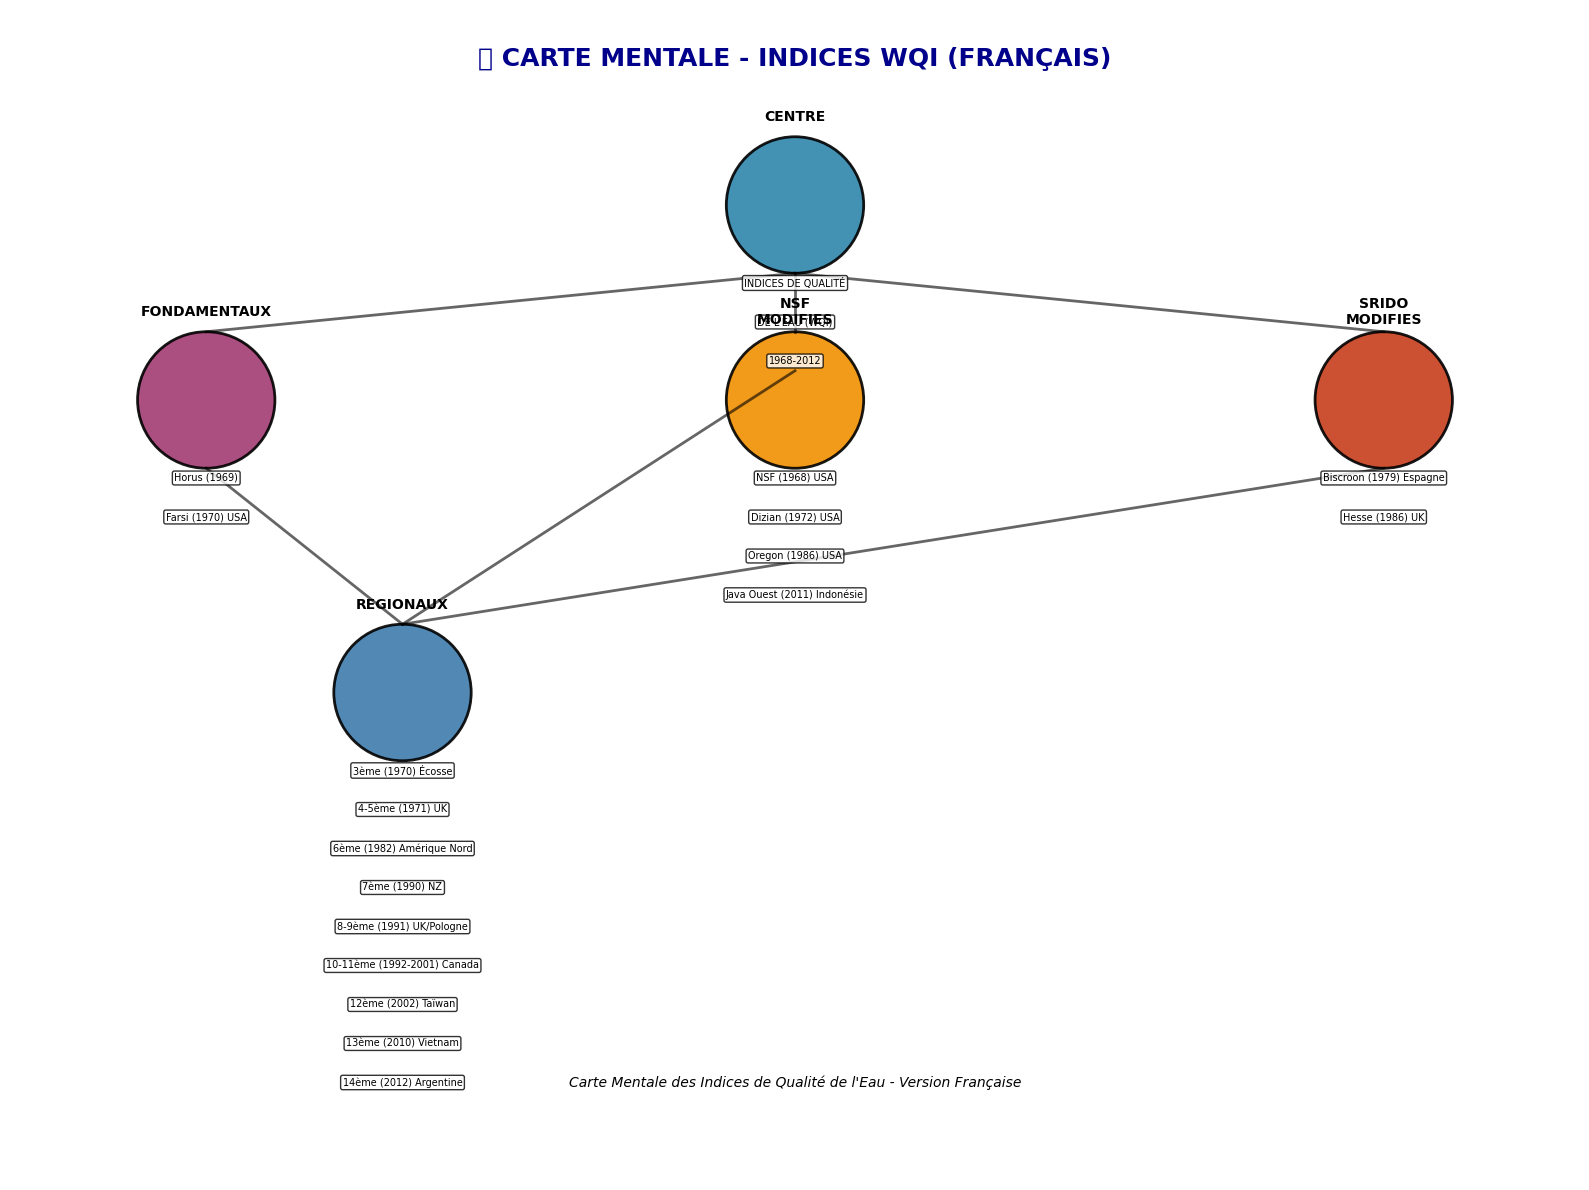

Carte mentale sauvegardée sous : carte_mentale_wqi_simple_fr.png

Cartes mentales générées avec succès!


In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, Circle
import numpy as np

def create_wqi_mind_map_french():
    # Configuration de la figure
    fig, ax = plt.subplots(1, 1, figsize=(18, 14))
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 14)
    ax.axis('off')
    
    # Couleurs pour les différentes catégories
    colors = {
        'centre': '#2E86AB',
        'fondamentaux': '#A23B72',
        'nsf': '#F18F01',
        'srido': '#C73E1D',
        'regionaux': '#3F7CAC',
        'autres': '#7DCFB6'
    }
    
    # CENTRE : INDICES WQI
    centre_x, centre_y = 9, 12
    centre_circle = Circle((centre_x, centre_y), 0.8, facecolor=colors['centre'], 
                          edgecolor='black', linewidth=2, alpha=0.9)
    ax.add_patch(centre_circle)
    ax.text(centre_x, centre_y, '🌍\nINDICES WQI\n(Qualité Eau)', 
            ha='center', va='center', fontsize=14, fontweight='bold', 
            color='white', linespacing=1.5)

    # === BRANCHE 1 : INDICES FONDAMENTAUX ===
    x1, y1 = 3, 10
    # Ligne de connexion
    ax.plot([centre_x-0.5, x1+0.8], [centre_y-0.8, y1+0.3], 'k-', lw=2, alpha=0.7)
    
    # Rectangle principal
    rect1 = FancyBboxPatch((x1-1.2, y1-0.4), 2.4, 0.8,
                          boxstyle="round,pad=0.1",
                          facecolor=colors['fondamentaux'],
                          edgecolor='black', linewidth=2)
    ax.add_patch(rect1)
    ax.text(x1, y1, '🧪 INDICES\nFONDAMENTAUX', 
            ha='center', va='center', fontsize=12, fontweight='bold', 
            color='white', linespacing=1.3)

    # Sous-éléments
    fondamentaux_items = [
        "• Index Horus (1969)",
        "• Modèle Farsi (1970)\n  États-Unis"
    ]
    for i, item in enumerate(fondamentaux_items):
        ax.text(x1, y1 - 1.2 - i*0.7, item, ha='center', va='center', 
                fontsize=9, fontweight='normal', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor='#E8E8E8', alpha=0.8))

    # === BRANCHE 2 : VERSIONS MODIFIÉES NSF ===
    x2, y2 = 9, 9
    ax.plot([centre_x, x2], [centre_y-0.8, y2+0.4], 'k-', lw=2, alpha=0.7)
    
    rect2 = FancyBboxPatch((x2-1.8, y2-0.4), 3.6, 0.8,
                          boxstyle="round,pad=0.1",
                          facecolor=colors['nsf'],
                          edgecolor='black', linewidth=2)
    ax.add_patch(rect2)
    ax.text(x2, y2, '🔄 VERSIONS MODIFIÉES\nBASÉES SUR NSF', 
            ha='center', va='center', fontsize=11, fontweight='bold', 
            color='white', linespacing=1.3)

    # Sous-éléments NSF
    nsf_items = [
        ("🎯 NSF Original (1968)", "États-Unis", x2-3, y2-1.2),
        ("📊 Index Dizian (1972)", "Version modifiée NSF\nÉtats-Unis", x2, y2-1.2),
        ("🌉 Index Oregon (1986)", "Version modifiée NSF\nÉtats-Unis", x2+3, y2-1.2),
        ("🏝️ Index Java Ouest (2011)", "Version modifiée NSF\nIndonésie", x2, y2-2.4)
    ]
    
    for name, desc, x, y in nsf_items:
        # Lignes de connexion
        ax.plot([x2, x], [y2-0.4, y+0.3], 'k--', lw=1, alpha=0.5)
        # Cercles des sous-éléments
        circle = Circle((x, y), 0.6, facecolor='#F8D568', 
                       edgecolor='black', linewidth=1, alpha=0.9)
        ax.add_patch(circle)
        ax.text(x, y, name, ha='center', va='center', 
                fontsize=8, fontweight='bold', linespacing=1.2)
        ax.text(x, y-0.9, desc, ha='center', va='center', 
                fontsize=7, style='italic', color='gray')

    # === BRANCHE 3 : VERSIONS MODIFIÉES SRIDO ===
    x3, y3 = 15, 10
    ax.plot([centre_x+0.5, x3-0.8], [centre_y-0.8, y3+0.3], 'k-', lw=2, alpha=0.7)
    
    rect3 = FancyBboxPatch((x3-1.2, y3-0.4), 2.4, 0.8,
                          boxstyle="round,pad=0.1",
                          facecolor=colors['srido'],
                          edgecolor='black', linewidth=2)
    ax.add_patch(rect3)
    ax.text(x3, y3, '🔄 VERSIONS\nMODIFIÉES SRIDO', 
            ha='center', va='center', fontsize=11, fontweight='bold', 
            color='white', linespacing=1.3)

    # Sous-éléments SRIDO
    srido_items = [
        "• Index Biscroon (1979)\n  Espagne",
        "• Index Hesse (1986)\n  Royaume-Uni"
    ]
    for i, item in enumerate(srido_items):
        ax.text(x3, y3 - 1.2 - i*0.8, item, ha='center', va='center', 
                fontsize=9, fontweight='normal',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='#E8E8E8', alpha=0.8))

    # === BRANCHE 4 : INDICES RÉGIONAUX ===
    x4, y4 = 3, 6
    ax.plot([x1, x4+0.5], [y1-1.2, y4+0.5], 'k-', lw=2, alpha=0.7)
    
    rect4 = FancyBboxPatch((x4-1.5, y4-0.4), 3.0, 0.8,
                          boxstyle="round,pad=0.1",
                          facecolor=colors['regionaux'],
                          edgecolor='black', linewidth=2)
    ax.add_patch(rect4)
    ax.text(x4, y4, '🗺️ INDICES\nRÉGIONAUX', 
            ha='center', va='center', fontsize=12, fontweight='bold', 
            color='white', linespacing=1.3)

    # Indices régionaux - Colonne gauche
    regionaux_gauche = [
        "• 3ème Index (1970)\n  Écosse",
        "• 4ème Index (1971)\n  Royaume-Uni", 
        "• 5ème Index (1971)\n  Royaume-Uni",
        "• 6ème Index (1982)\n  Amérique du Nord",
        "• 7ème Index (1990)\n  Nouvelle-Zélande"
    ]
    for i, item in enumerate(regionaux_gauche):
        ax.text(x4-2, y4 - 1.2 - i*0.7, item, ha='left', va='center', 
                fontsize=8, fontweight='normal',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='#D4E6F1', alpha=0.8))

    # Indices régionaux - Colonne droite
    regionaux_droite = [
        "• 8ème Index (1991)\n  Royaume-Uni",
        "• 9ème Index (1991)\n  Pologne",
        "• 10ème Index (1992)\n  Canada", 
        "• 11ème Index (2001)\n  Canada",
        "• 12ème Index (2002)\n  Taïwan",
        "• 13ème Index (2010)\n  Vietnam",
        "• 14ème Index (2012)\n  Argentine"
    ]
    for i, item in enumerate(regionaux_droite):
        ax.text(x4+2, y4 - 1.2 - i*0.7, item, ha='left', va='center', 
                fontsize=8, fontweight='normal',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='#D4E6F1', alpha=0.8))

    # === BRANCHE 5 : AUTRES MODIFICATIONS ===
    x5, y5 = 15, 6
    ax.plot([x3, x5-0.5], [y3-1.2, y5+0.5], 'k-', lw=2, alpha=0.7)
    
    rect5 = FancyBboxPatch((x5-1.2, y5-0.4), 2.4, 0.8,
                          boxstyle="round,pad=0.1",
                          facecolor=colors['autres'],
                          edgecolor='black', linewidth=2)
    ax.add_patch(rect5)
    ax.text(x5, y5, '📋 AUTRES\nMODIFICATIONS', 
            ha='center', va='center', fontsize=11, fontweight='bold', 
            color='white', linespacing=1.3)

    autres_items = [
        "• Diverses versions\n  modifiées",
        "• Adaptations\n  régionales", 
        "• Méthodologies\n  hybrides"
    ]
    for i, item in enumerate(autres_items):
        ax.text(x5, y5 - 1.2 - i*0.7, item, ha='center', va='center', 
                fontsize=9, fontweight='normal',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='#E8E8E8', alpha=0.8))

    # === LÉGENDE ET INFORMATIONS ===
    # Légende des couleurs
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, fc=colors['fondamentaux'], label='Indices Fondamentaux'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['nsf'], label='Versions NSF'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['srido'], label='Versions SRIDO'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['regionaux'], label='Indices Régionaux'),
        plt.Rectangle((0, 0), 1, 1, fc=colors['autres'], label='Autres Modifications')
    ]
    
    ax.legend(handles=legend_elements, loc='lower center', 
              bbox_to_anchor=(0.5, 0.02), ncol=3, fontsize=10,
              frameon=True, fancybox=True, shadow=True)

    # Informations supplémentaires
    info_text = "Carte Mentale des Indices de Qualité de l'Eau (WQI)\nDéveloppement historique et relations entre les différentes méthodologies"
    ax.text(9, 13.5, info_text, ha='center', va='center', 
            fontsize=16, fontweight='bold', color='darkblue')

    # Timeline indicative
    ax.text(9, 0.8, "Évolution Temporelle: 1968 → 2012", 
            ha='center', va='center', fontsize=10, style='italic', 
            bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', alpha=0.8))

    plt.tight_layout()
    return fig, ax

def create_simple_wqi_mind_map_french():
    """Version simplifiée de la carte mentale"""
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    # Titre
    ax.text(8, 11.5, '🧠 CARTE MENTALE - INDICES WQI (FRANÇAIS)', 
            ha='center', va='center', fontsize=18, fontweight='bold', 
            color='darkblue')
    
    # Structure centrale simplifiée
    categories = {
        'CENTRE': {'pos': (8, 10), 'color': '#2E86AB', 'items': [
            'INDICES DE QUALITÉ',
            'DE L\'EAU (WQI)',
            '1968-2012'
        ]},
        
        'FONDAMENTAUX': {'pos': (2, 8), 'color': '#A23B72', 'items': [
            'Horus (1969)',
            'Farsi (1970) USA'
        ]},
        
        'NSF_MODIFIES': {'pos': (8, 8), 'color': '#F18F01', 'items': [
            'NSF (1968) USA',
            'Dizian (1972) USA',
            'Oregon (1986) USA', 
            'Java Ouest (2011) Indonésie'
        ]},
        
        'SRIDO_MODIFIES': {'pos': (14, 8), 'color': '#C73E1D', 'items': [
            'Biscroon (1979) Espagne',
            'Hesse (1986) UK'
        ]},
        
        'REGIONAUX': {'pos': (4, 5), 'color': '#3F7CAC', 'items': [
            '3ème (1970) Écosse',
            '4-5ème (1971) UK',
            '6ème (1982) Amérique Nord',
            '7ème (1990) NZ',
            '8-9ème (1991) UK/Pologne',
            '10-11ème (1992-2001) Canada',
            '12ème (2002) Taïwan',
            '13ème (2010) Vietnam',
            '14ème (2012) Argentine'
        ]}
    }
    
    # Dessiner les catégories
    for cat_name, cat_data in categories.items():
        x, y = cat_data['pos']
        color = cat_data['color']
        
        # Cercle principal
        circle = Circle((x, y), 0.7, facecolor=color, alpha=0.9,
                       edgecolor='black', linewidth=2)
        ax.add_patch(circle)
        
        # Texte du titre
        ax.text(x, y + 0.9, cat_name.replace('_', '\n'), 
                ha='center', va='center', fontsize=10, fontweight='bold')
        
        # Items
        for i, item in enumerate(cat_data['items']):
            ax.text(x, y - 0.8 - i*0.4, item, ha='center', va='center', 
                    fontsize=7, 
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))
    
    # Connexions
    connections = [
        ((8, 9.3), (2, 8.7)),  # Centre → Fondamentaux
        ((8, 9.3), (8, 8.7)),  # Centre → NSF
        ((8, 9.3), (14, 8.7)), # Centre → SRIDO  
        ((8, 8.3), (4, 5.7)),  # NSF → Régionaux
        ((2, 7.3), (4, 5.7)),  # Fondamentaux → Régionaux
        ((14, 7.3), (4, 5.7))  # SRIDO → Régionaux
    ]
    
    for start, end in connections:
        ax.plot([start[0], end[0]], [start[1], end[1]], 'k-', lw=2, alpha=0.6)
    
    # Légende
    ax.text(8, 1, "Carte Mentale des Indices de Qualité de l'Eau - Version Française", 
            ha='center', va='center', fontsize=10, style='italic')
    
    plt.tight_layout()
    return fig, ax

def save_mind_map(filename='carte_mentale_wqi_francais.png', dpi=300, version='detail'):
    """Sauvegarder la carte mentale"""
    if version == 'detail':
        fig, ax = create_wqi_mind_map_french()
    else:
        fig, ax = create_simple_wqi_mind_map_french()
    
    plt.savefig(filename, dpi=dpi, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    plt.close()
    print(f"Carte mentale sauvegardée sous : {filename}")

# Menu principal
def main():
    print("Génération de la carte mentale WQI en français...")
    print("\nChoisissez la version:")
    print("1. Version détaillée (recommandée)")
    print("2. Version simplifiée")
    
    choice = input("\nVotre choix (1-2): ").strip()
    
    if choice == '1':
        create_wqi_mind_map_french()
        plt.show()
        save_mind_map('carte_mentale_wqi_detail_fr.png', version='detail')
    elif choice == '2':
        create_simple_wqi_mind_map_french()
        plt.show()
        save_mind_map('carte_mentale_wqi_simple_fr.png', version='simple')
    else:
        # Créer les deux versions
        create_wqi_mind_map_french()
        plt.show()
        save_mind_map('carte_mentale_wqi_detail_fr.png', version='detail')
        
        create_simple_wqi_mind_map_french()
        plt.show()
        save_mind_map('carte_mentale_wqi_simple_fr.png', version='simple')
    
    print("\nCartes mentales générées avec succès!")

if __name__ == "__main__":
    main()